In [1]:
# Добавление нужной метрике к кривой обучения catboost
# eval_weights_validation = df_validation['weight'].get_values()
# class CustomMetric(object):
#     def get_final_error(self, error, weight):
#         return error

#     def is_max_optimal(self):
#         return True

#     def evaluate(self, approxes, target, weight):
#         # approxes - list of list-like objects (one object per approx dimension)
#         # target - list-like object
#         # weight - list-like object, can be None

#         p = np.array(approxes[0])
#         y = np.array(target)
#         print(type(weight))
#         if weight is not None:
#             res = scoring.rejection90(y, p, sample_weight = np.array(weight))
#         else:
#             res = scoring.rejection90(y, p, sample_weight = eval_weights_validation)

#         return res, res

# m = catboost.CatBoostClassifier(iterations=10000, max_depth=8, 
#                                 thread_count=30, verbose=True, 
#                                 custom_loss = ['Logloss', 'AUC','Precision','Recall','F1'],
#                                 eval_metric = CustomMetric(),
#                                 loss_function='CrossEntropy')

# # custom_metric
# eval_set = (df_validation[features1], 
#             df_validation[target])
# #             df_train_part[:1000]['weight'])

# m.fit(df_train_part[features1], 
#       df_train_part[target], 
#       eval_set = eval_set,
#       sample_weight=np.abs(df_train_part['weight']),
#     plot = True)

ПЛАН:
 - Отослать посылку по задаче С
     - Посмотреть на сколько сложно работать со скоростью
 - Добавить признаков
    (каких?)
    - Точка пересечения траектории частицы с линией ускоритель 
        Или расстояние от прямой траектории до прямой ускоритель
    - Апроксимация траектории параболой (есть две точки) -> ускорение частицы
    - Там есть ошибка MatchedHit_D{X,Y,Z}[N], значит для угла и ошибки от траетории можно построить оценку сверху и 
        оценку снизу
    - Скорости 

In [2]:
import scoring

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
# from matplotlib import pyplot as plt
# %matplotlib inline

In [3]:
# from xgboost import XGBClassifier
import catboost

Путь к выборке

In [4]:
path = '../data/'

In [5]:
# from imblearn.under_sampling import RandomUnderSampler


In [6]:
# rus = RandomUnderSampler(sampling_strategy='all')

In [8]:
# %%time
# df_train = pd.read_csv(path+'train_v2_merged.csv')
# df_test  = pd.read_csv(path+'test_public_v2.csv')

# # df_small = pd.read_csv(path+'advanced_baseline_train.csv', nrows=3000)


In [9]:
# df_small['label'].describe()

In [10]:
# df_small.iloc[df_small['label'] < 1.0].describe()

In [11]:
# tmp = rus.fit_resample(df_small, df_small['label'])

In [12]:
# pd.DataFrame(tmp[0], columns=df_small.columns)['label'].describe()

In [7]:
%%time
# df_train = pd.read_csv(path+'train_v2_merged.csv')
# df_test  = pd.read_csv(path+'test_public_v2.csv')

df_train = pd.read_csv(path+'advanced_baseline_train.csv')
df_test  = pd.read_csv(path+'advanced_baseline_test.csv')

CPU times: user 1min 46s, sys: 4.86 s, total: 1min 51s
Wall time: 1min 51s


In [8]:
if "Unnamed: 0" in df_train.columns:
    print('df_train contain Unnamed: 0')
    del df_train['Unnamed: 0']

df_train contain Unnamed: 0


In [9]:
print(df_test.keys())

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

In [10]:
print(df_train.keys())

Index(['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_

Разделим на train и validation

In [12]:
df = df_train[:10000]

In [68]:
xs0.shape

(2, 3)

<IPython.core.display.Javascript object>


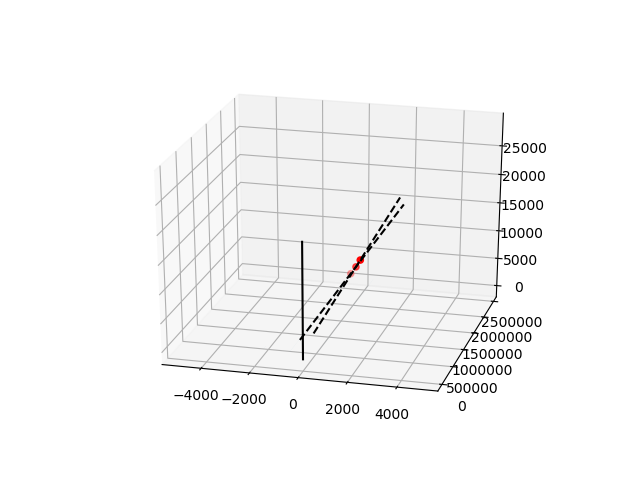

In [104]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

ind_0 = df[df['particle_type'] == 0].index[:1]
ind_1 = df[df['particle_type'] == 1].index[:0]
ind_2 = df[df['particle_type'] == 2].index[:0]

def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

def get_line_from_dots(x0, x1, y0, y1, z0, z1, theta_list = [-10, 10]):
    A = np.array([x0, y0, z0])
    B = np.array([x1, y1, z1])
    T = np.array([(A + (B-A)*theta) for theta in theta_list])
    return T.T[0], T.T[1], T.T[2]

def draw_two_line(ax, xs, ys, zs, ind_list = None, c='black'):
    if ind_list is None:
        ind_list = list(range(xs.shape[0]))
        
    if type(ind_list) is not list:
        ind_list = [ind_list]
        
    for ind in ind_list:
        T = get_line_from_dots(*xs[ind][:2], *ys[ind][:2], *zs[ind][:2])
        ax.plot(*T, c='black', linestyle='dashed')
        T = get_line_from_dots(*xs[ind][1:], *ys[ind][1:], *zs[ind][1:])
        ax.plot(*T, c='black', linestyle='dashed')
    return

fig = plt.figure()
n = 100
ax = fig.add_subplot(111, projection='3d')
xs0 = df.loc[ind_0, ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]']].get_values()
ys0 = df.loc[ind_0, ['MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]']].get_values()
zs0 = df.loc[ind_0, ['MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]']].get_values()

# A = np.array([xs0[0], ys0[0], zs0[0]])
# B = np.array([xs0[1], ys0[1], zs0[1]])
# T = np.array([(A + (B-A)*theta) for theta in [-10, 10]])
# T = get_line_from_dots(*xs0[0][:2], *ys0[0][:2], *zs0[0][:2])
# ax.plot(*T, c='black', linestyle='dashed')
# T = get_line_from_dots(*xs0[0][1:], *ys0[0][1:], *zs0[0][1:])
# ax.plot(*T, c='black', linestyle='dashed')
# ax.scatter(xs0, ys0, zs0, c='r', marker='x')
draw_two_line(ax, xs0, ys0, zs0, c='r')
ax.scatter(xs0, ys0, zs0, c='r', marker='o')


xs1 = df.loc[ind_1, ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]']].get_values()
ys1 = df.loc[ind_1, ['MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]']].get_values()
zs1 = df.loc[ind_1, ['MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]']].get_values()
draw_two_line(ax, xs1, ys1, zs1, c='g')
ax.scatter(xs1, ys1, zs1, c='g', marker='x')




xs2 = df.loc[ind_2, ['MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]']].get_values()
ys2 = df.loc[ind_2, ['MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]']].get_values()
zs2 = df.loc[ind_2, ['MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]']].get_values()
draw_two_line(ax, xs2, ys2, zs2, c='b')
ax.scatter(xs2, ys2, zs2, c='b', marker='o')
# draw_two_line(ax, xs2, ys2, zs2)


z = np.linspace(0, 20000, 10)
x = z*0
y = z*0
ax.plot(x, y, z, c='black', label='parametric curve')

In [213]:
import catboost
catboost.CatBoostClassifier()

In [ ]:
%%time
#new features generation
df = df_test
from tqdm import tqdm_notebook


def distance_to_tube(X0, X1):
    """
    X1: [x0, y0, z0] - dot 1
    X2 - dot2
    """
    r1 = X0
    e1 = X1-X0

    r2 = np.array([0,0,0])
    e2 = np.array([0,0,1])
    
    n = np.cross(e1, e2)
    return n.dot(r1 - r2) / np.linalg.norm(n)
# array([-3,  6, -3])

def angle_tube(X0, X1):
    """
    X1: [x0, y0, z0] - dot 1
    X2 - dot2
    """
    e1 = X1-X0

    e2 = np.array([0,0,1])
    
    n = np.cross(e1, e2)
    return np.arccos(e1.dot(e2)/np.linalg.norm(e1))*180/np.pi



cord_features = np.array([["MatchedHit_%s[%d]"%(cord, ind) for cord in ['X', "Y", 'Z']] for ind in  [0,1,2]])


df['A1'] = [np.array(i) for i in tqdm_notebook(df[cord_features[0]].get_values())]
df['A2'] = [np.array(i) for i in tqdm_notebook(df[cord_features[1]].get_values())]
df['A3'] = [np.array(i) for i in tqdm_notebook(df[cord_features[2]].get_values())]

df['tubedist12'] = [distance_to_tube(X1, X2) for X1, X2 in tqdm_notebook(df[['A1', 'A2']].get_values())]
df['tubedist23'] = [distance_to_tube(X1, X2) for X1, X2 in tqdm_notebook(df[['A2', 'A3']].get_values())]
df['tubedist13'] = [distance_to_tube(X1, X2) for X1, X2 in tqdm_notebook(df[['A1', 'A3']].get_values())]

df['diff_tubedist_12_23_abs'] = df['tubedist12']-df['tubedist23']
df['diff_tubedist_12_23_ret'] = df['diff_tubedist_12_23_abs']/df['tubedist12']

df['diff_tubedist_12_13_abs'] = df['tubedist12']-df['tubedist13']
df['diff_tubedist_12_13_ret'] = df['diff_tubedist_12_13_abs']/df['tubedist12']

df['tubeangle12'] = [angle_tube(X1, X2) for X1, X2 in tqdm_notebook(df[['A1', 'A2']].get_values())]
df['tubeangle23'] = [angle_tube(X1, X2) for X1, X2 in tqdm_notebook(df[['A2', 'A3']].get_values())]
df['tubeangle13'] = [angle_tube(X1, X2) for X1, X2 in tqdm_notebook(df[['A1', 'A3']].get_values())]

df['dif_angle_abs'] = df['tubeangle23']-df['tubeangle12']
df['dif_angle_ret'] = df['dif_angle_abs']/df['tubeangle12']

In [181]:
def distance_to_tube(X0, X1):
    """
    X1: [x0, y0, z0] - dot 1
    X2 - dot2
    """
    r1 = X0
    e1 = X1-X0

    r2 = np.array([0,0,0])
    e2 = np.array([0,0,1])
    
    n = np.cross(e1, e2)
    return n.dot(r1 - r2) / np.linalg.norm(n)
# array([-3,  6, -3])

def angle_tube(X0, X1):
    """
    X1: [x0, y0, z0] - dot 1
    X2 - dot2
    """
    e1 = X1-X0

    e2 = np.array([0,0,1])
    
    n = np.cross(e1, e2)
    return np.arccos(e1.dot(e2)/np.linalg.norm(e1))*180/np.pi

In [166]:
np.cross(e1, e2)
# e1, e2
np.pi

3.141592653589793

In [133]:
for i in df_train[temp[0]].get_values():
    print(i)
    break

[-2685.08    1373.3481 15123.045 ]


In [180]:
# df_train[df_train['particle_type'] == 0]
# df_train['diff_tubedist_12_23_ret'][:100000].hist(10000)

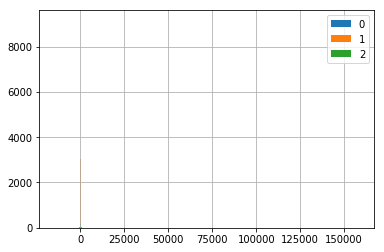

In [172]:
%matplotlib inline
df_train[df_train['particle_type'] == 0]['tubedist23'][:10000].hist(bins = 1000, label = '0')
df_train[df_train['particle_type'] == 1]['tubedist23'][:10000].hist(bins = 1000, label = '1')
df_train[df_train['particle_type'] == 2]['tubedist23'][:10000].hist(bins = 1000, label = '')
plt.legend()
plt.show()

In [138]:
from tqdm import tqdm

cord_features = np.array([["MatchedHit_%s[%d]"%(cord, ind) for cord in ['X', "Y", 'Z']] for ind in  [0,1,2]])


df_train['A1'] = [np.array(i) for i in tqdm_notebook(df_train[cord_features[0]].get_values())]
df_train['A2'] = [np.array(i) for i in tqdm_notebook(df_train[cord_features[1]].get_values())]
df_train['A3'] = [np.array(i) for i in tqdm_notebook(df_train[cord_features[2]].get_values())]

100%|██████████| 5445705/5445705 [00:04<00:00, 1177350.68it/s]


In [154]:
from tqdm import tqdm_notebook

df_train['tubedist12'] = [distance_to_tube(X1, X2) for X1, X2 in tqdm_notebook(df_train[['A1', 'A2']].get_values())]
df_train['tubedist23'] = [distance_to_tube(X1, X2) for X1, X2 in tqdm_notebook(df_train[['A2', 'A3']].get_values())]
df_train['tubedist13'] = [distance_to_tube(X1, X2) for X1, X2 in tqdm_notebook(df_train[['A1', 'A3']].get_values())]

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))


  3%|▎         | 176942/5445705 [00:32<16:10, 5427.16it/s] 

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

In [171]:
df_train['diff_tubedist_12_23_abs'] = df_train['tubedist12']-df_train['tubedist23']
df_train['diff_tubedist_12_23_ret'] = df_train['diff_tubedist_12_23_abs']/df_train['tubedist12']

df_train['diff_tubedist_12_13_abs'] = df_train['tubedist12']-df_train['tubedist13']
df_train['diff_tubedist_12_13_ret'] = df_train['diff_tubedist_12_13_abs']/df_train['tubedist12']

In [182]:
df_train['tubeangle12'] = [angle_tube(X1, X2) for X1, X2 in tqdm_notebook(df_train[['A1', 'A2']].get_values())]
df_train['tubeangle23'] = [angle_tube(X1, X2) for X1, X2 in tqdm_notebook(df_train[['A2', 'A3']].get_values())]
df_train['tubeangle13'] = [angle_tube(X1, X2) for X1, X2 in tqdm_notebook(df_train[['A1', 'A3']].get_values())]

df_train['dif_angle_abs'] = df_train['tubeangle23']-df['tubeangle12']
df_train['dif_angle_ret'] = df_train['dif_angle_abs']/df['tubeangle12']

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

Exception in thread Thread-14:
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/anaconda3/lib/python3.6/site-packages/tqdm/_monitor.py", line 63, in run
    for instance in self.tqdm_cls._instances:
  File "/anaconda3/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

KeyError: 'tubeangle12'

In [185]:
df_train['dif_angle_abs'] = df_train['tubeangle23']-df_train['tubeangle12']
df_train['dif_angle_ret'] = df_train['dif_angle_abs']/df_train['tubeangle12']

In [188]:
features = list(df_train.keys())
print(features)

['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]', 'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]', 'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]', 'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]', 'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]', 'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]', 'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]', 'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]', 'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]', 'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]', 'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_Y[1]', 'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared', 'Mextra_DX2[0]', 'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mext

In [195]:
df_train['NA1'] = [np.linalg.norm(i) for i in tqdm_notebook(df_train['A1'])]
df_train['NA2'] = [np.linalg.norm(i) for i in tqdm_notebook(df_train['A2'])]
df_train['NA3'] = [np.linalg.norm(i) for i in tqdm_notebook(df_train['A3'])]

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

HBox(children=(IntProgress(value=0, max=5445705), HTML(value='')))

In [ ]:
df_train.

In [210]:
short_list_features = features[-15:]

In [212]:
import pickle
pickle.dump(df_train[short_list_features], open('../data/df_train_15_new.pickle', 'wb'))

In [200]:
features = list(df_train.keys())
features.app
print(features[-15:])

['A3', 'tubedist12', 'tubedist23', 'tubedist13', 'diff_tubedist_12_23_abs', 'diff_tubedist_12_23_ret', 'diff_tubedist_12_13_abs', 'diff_tubedist_12_13_ret', 'tubeangle12', 'tubeangle23', 'tubeangle13', 'dif_angle_abs', 'dif_angle_ret', 'NA1', 'NA2', 'NA3']


In [ ]:
# for X1, X2 in df_train[['A1', 'A2']].get_values():
#     print(X1.shape)
#     print(X1)
#     break

In [ ]:
# df_train['A1']

In [127]:
obj = df.loc[0, :]
temp = np.array([["MatchedHit_%s[%d]"%(cord, ind) for cord in ['X', "Y", 'Z']] for ind in  [0,1,2]])
[obj[i].get_values() for i in temp]

[array([-2685.08  ,  1373.3481, 15123.045 ]),
 array([-2954.3   ,  1481.2622, 16327.633 ]),
 array([-3140.97  ,  1590.3975, 17520.826 ])]

In [105]:
distance_to_tube(xs0[0], xs0[1])
distance_to_tube(xs0[1], xs0[2])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [46]:
# k12 = np.array(xs0[1]-xs0[0], ys0[1]-ys0[0], zs0[1]-zs0[0])
# t12 = np.array([(xs[0]+theta * k12, ys[0]+theta * k12, zs[0]+theta * k12) for theta in [-10, 10]])

# k = np.array([i[0]-i[1] for i in [xs0, ys0, zs0]])
A = np.array([xs0[0], ys0[0], zs0[0]])
B = np.array([xs0[1], ys0[1], zs0[1]])
T = np.array([(A + (B-A)*theta) for theta in [-10, 10]])
T.T[0]
# t = [np.array(xs0[0], ys0[0], zs0[0])]

array([-119.5, 3989.7])

In [19]:
xs.get_values()[0]

array([ -953.08, -1028.4 , -1072.17])

In [17]:
%%time
df_train_part, df_validation = train_test_split(df_train, test_size=0.25, shuffle=True, random_state = 42)

CPU times: user 8.27 s, sys: 916 ms, total: 9.19 s
Wall time: 9.17 s


In [18]:
from functions_050218_ import get_dataframe_pair_diff_ncl, get_mean_count_points, get_len_div_dt

In [19]:
%%time
temp = get_dataframe_pair_diff_ncl(df_validation)

CPU times: user 42.7 ms, sys: 121 ms, total: 164 ms
Wall time: 199 ms


In [20]:
temp

,diff_ncl_0_1,diff_ncl_1_2,diff_ncl_2_3
3479269,-93,-16,7
2277850,-33,-2,6
3855171,-41,-1,-5
3311447,-49,-37,10
983196,-36,-4,2
3289639,-53,-3,7
1964379,-21,-33,-5
270606,-13,-8,1
4134314,-27,18,-14
214463,-32,-3,0


In [21]:
# def calculate_angle(df):
#     """ 
#         params: 
#             df - df with keys MatchedHit_{X, Y, Z}[{0,1 , 2}]
#         return 
#             np.array
#     """
#     x1 = (df['MatchedHit_X[1]'] - df['MatchedHit_X[0]'],\
#           df['MatchedHit_Y[1]'] - df['MatchedHit_Y[0]'],\
#           df['MatchedHit_Z[1]'] - df['MatchedHit_Z[0]'])

#     x2 = (df['MatchedHit_X[2]'] - df['MatchedHit_X[1]'],\
#           df['MatchedHit_Y[2]'] - df['MatchedHit_Y[1]'],\
#           df['MatchedHit_Z[2]'] - df['MatchedHit_Z[1]'])

#     scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
#     scalar11 = np.sum([i**2 for i in x1], axis = 0)
#     scalar22 = np.sum([i**2 for i in x2], axis = 0)

#     return np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi


# def calc_ind_closure(ind, start_ind=0):
#     def calculate_angle_ind(df):
#         """ 
#             params: 
#                 df - df with keys MatchedHit_{X, Y, Z}[{0,1 , 2}]
#             return 
#                 np.array
#         """
#         i0 = start_ind
#         i1 = start_ind + 1
#         i2 = start_ind + 2
#         x1 = (df['MatchedHit_X[%i]' % i1] - df['MatchedHit_X[%i]' % i0],\
#               df['MatchedHit_Y[%i]' % i1] - df['MatchedHit_Y[%i]' % i0],\
#               df['MatchedHit_Z[%i]' % i1] - df['MatchedHit_Z[%i]' % i0])

#         x2 = (df['MatchedHit_X[%i]' % i2] - df['MatchedHit_X[%i]' % i1],\
#               df['MatchedHit_Y[%i]' % i2] - df['MatchedHit_Y[%i]' % i1],\
#               df['MatchedHit_Z[%i]' % i2] - df['MatchedHit_Z[%i]' % i1])

#         scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
#         scalar11 = np.sum([i**2 for i in x1], axis = 0)
#         scalar22 = np.sum([i**2 for i in x2], axis = 0)

#         return np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi
#     return calculate_angle_ind

    

# def get_column_lengths_trajectory(data):
#     """
#       Длинна траектории, чтобы это не значило
#     """
#     lengths = np.ones(len(data)) * 4
#     for i in range(3, -1, -1):
#         indices = np.where(data['MatchedHit_Z[{}]'.format(i)] < -9800)[0]
#         lengths[indices] = i 
#     return lengths

# def calc_diff_btw_trajectory_and_extr(data):
#     diff_columns = {}
#     res = np.zeros(len(data))
#     for i in range(4):
#         diff_columns[i] = {}
#         for l in ['X', 'Y']:
#             diff_columns[i][l] = (data["MatchedHit_%s[%i]"%(l, i)] - data["Lextra_%s[%i]"%(l, i)])**2
#         res += np.sqrt(diff_columns[i]['X'] + diff_columns[i]['Y'])
#     return res

# # FEATURES

def calculate_angle(df):
    """
        params:
            df - df with keys MatchedHit_{X, Y, Z}[{0,1 , 2}]
        return
            np.array
    """
    x1 = (df['MatchedHit_X[1]'] - df['MatchedHit_X[0]'],\
          df['MatchedHit_Y[1]'] - df['MatchedHit_Y[0]'],\
          df['MatchedHit_Z[1]'] - df['MatchedHit_Z[0]'])

    x2 = (df['MatchedHit_X[2]'] - df['MatchedHit_X[1]'],\
          df['MatchedHit_Y[2]'] - df['MatchedHit_Y[1]'],\
          df['MatchedHit_Z[2]'] - df['MatchedHit_Z[1]'])

    scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
    scalar11 = np.sum([i**2 for i in x1], axis = 0)
    scalar22 = np.sum([i**2 for i in x2], axis = 0)

    return ['angle'], [np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi]

def calculate_angle_ind(df, start_ind=1):
    """ 
        params: 
            df - df with keys MatchedHit_{X, Y, Z}[{0,1 , 2}]
        return 
            np.array
    """
    i0 = (start_ind     ) % 3
    i1 = (start_ind + 1 ) % 3
    i2 = (start_ind + 2 ) % 3
    
    x1 = (df['MatchedHit_X[%i]' % i1] - df['MatchedHit_X[%i]' % i0],\
          df['MatchedHit_Y[%i]' % i1] - df['MatchedHit_Y[%i]' % i0],\
          df['MatchedHit_Z[%i]' % i1] - df['MatchedHit_Z[%i]' % i0])

    x2 = (df['MatchedHit_X[%i]' % i2] - df['MatchedHit_X[%i]' % i1],\
          df['MatchedHit_Y[%i]' % i2] - df['MatchedHit_Y[%i]' % i1],\
          df['MatchedHit_Z[%i]' % i2] - df['MatchedHit_Z[%i]' % i1])

    scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
    scalar11 = np.sum([i**2 for i in x1], axis = 0)
    scalar22 = np.sum([i**2 for i in x2], axis = 0)

    return  ['angle%d'%start_ind], [np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi]

def calculate_angle_0(data):
    return calculate_angle_ind(data, start_ind=0)

def calculate_angle_1(data):
    return calculate_angle_ind(data, start_ind=1)

def calculate_angle_2(data):
    return calculate_angle_ind(data, start_ind=2)

def get_column_lengths_trajectory(data):
    """
      Длинна траектории, чтобы это не значило
    """
    lengths = np.ones(len(data)) * 4
    for i in range(3, -1, -1):
        indices = np.where(data['MatchedHit_Z[{}]'.format(i)] < -9800)[0]
        lengths[indices] = i
    return ['traj_len'], [lengths]


def calc_diff_btw_trajectory_and_extr(data):
    diff_columns = {}
    res = np.zeros(len(data))
    for i in range(4):
        diff_columns[i] = {}
        for l in ['X', 'Y']:
            diff_columns[i][l] = (data["MatchedHit_%s[%i]"%(l, i)] - data["Lextra_%s[%i]"%(l, i)])**2
        res += np.sqrt(diff_columns[i]['X'] + diff_columns[i]['Y'])
    return ['deff_exp_ext'], [res]

# 3 колонки
def get_pair_diff_ncl(data):
    names = ['diff_ncl_0_1', 'diff_ncl_1_2', 'diff_ncl_2_3']
    serieses = []
    for i in range(3):
        diff = data['ncl[{}]'.format(i+1)] - data['ncl[{}]'.format(i)]
        serieses.append(diff)
    return names, serieses


# 7 колонок
def get_mean_count_points(data):
    prod_columns = ['mean_count_p_0', 'mean_count_p_1', 'mean_count_p_2', 'mean_count_p_3']
    diff_columns = ['diff_c_p_0_1', 'diff_c_p_1_2', 'diff_c_p_2_3']
    serieses = []
    for i in range(4):
        prod = data['ncl[{}]'.format(i)] * data['avg_cs[{}]'.format(i)]
        indices = np.where(data['MatchedHit_Z[{}]'.format(i)] < -9800)[0]
        prod.iloc[indices] = 0
        serieses.append(prod)

    for i in range(3):
        diff = serieses[i+1] - serieses[i]
        serieses.append(diff)

    return prod_columns + diff_columns, serieses
# get_mean_count_points(df_train_part)  # for debug

# 4 колонки
def get_len_div_dt(data):
    # in case someone wants to recalculate MEANS
    # MEANS_MH_Z = [train_data['MatchedHit_Z[{}]'.format(i)].mean() for i in range(4)]
    MEANS_MH_Z = [15261.270799160593, 16467.120796929295, 17203.93227585082, 18349.625745344583]

    names = []
    serieses = []
    for i in range(4):
        name = 'len_div_dt_[{}]'.format(i)
        names.append(name)
#         print(type(data[['MatchedHit_Z[{}]'.format(i)]].values))
#         print(data[['MatchedHit_Z[{}]'.format(i)]].values[:,0])
        div = None
#         print(data['MatchedHit_T[{}]'.format(i)].values.shape)
        div = (data[['MatchedHit_Z[{}]'.format(i)]].values[:,0] - MEANS_MH_Z[i]) / data['MatchedHit_T[{}]'.format(i)].values
        serieses.append(pd.Series(div))
    return names, serieses

# get_len_div_dt(df_train_part)  # for debug

In [22]:
# def calculate_angle(df):
#     """ 
#         params: 
#             df - df with keys MatchedHit_{X, Y, Z}[{0,1 , 2}]
#         return 
#             np.array
#     """
#     x1 = (df['MatchedHit_X[1]'] - df['MatchedHit_X[0]'],\
#           df['MatchedHit_Y[1]'] - df['MatchedHit_Y[0]'],\
#           df['MatchedHit_Z[1]'] - df['MatchedHit_Z[0]'])

#     x2 = (df['MatchedHit_X[2]'] - df['MatchedHit_X[1]'],\
#           df['MatchedHit_Y[2]'] - df['MatchedHit_Y[1]'],\
#           df['MatchedHit_Z[2]'] - df['MatchedHit_Z[1]'])

#     scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
#     scalar11 = np.sum([i**2 for i in x1], axis = 0)
#     scalar22 = np.sum([i**2 for i in x2], axis = 0)
#     return np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi
# #     return pd.Series({'angle' : np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi})


# def calculate_angle_ind(df, start_ind=1):
#     """ 
#         params: 
#             df - df with keys MatchedHit_{X, Y, Z}[{0,1 , 2}]
#         return 
#             np.array
#     """
#     i0 = (start_ind     ) % 3
#     i1 = (start_ind + 1 ) % 3
#     i2 = (start_ind + 2 ) % 3
    
#     x1 = (df['MatchedHit_X[%i]' % i1] - df['MatchedHit_X[%i]' % i0],\
#           df['MatchedHit_Y[%i]' % i1] - df['MatchedHit_Y[%i]' % i0],\
#           df['MatchedHit_Z[%i]' % i1] - df['MatchedHit_Z[%i]' % i0])

#     x2 = (df['MatchedHit_X[%i]' % i2] - df['MatchedHit_X[%i]' % i1],\
#           df['MatchedHit_Y[%i]' % i2] - df['MatchedHit_Y[%i]' % i1],\
#           df['MatchedHit_Z[%i]' % i2] - df['MatchedHit_Z[%i]' % i1])

#     scalar12 = np.sum([i*j for i,j in zip(x1, x2)], axis = 0)
#     scalar11 = np.sum([i**2 for i in x1], axis = 0)
#     scalar22 = np.sum([i**2 for i in x2], axis = 0)

#     return  np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi
# #     return pd.Series({'angle%d'%(start_ind) : np.arccos(scalar12/np.sqrt(scalar11*scalar22))*180/np.pi})

# def calculate_angle_0(data):
#     return calculate_angle(data)

In [167]:
# %%time
# _ = calculate_angle(df_validation)

CPU times: user 3.36 s, sys: 270 ms, total: 3.63 s
Wall time: 3.08 s


In [168]:
# %%time
# _ = calculate_angle_0(df_validation)

CPU times: user 3.35 s, sys: 247 ms, total: 3.6 s
Wall time: 3.05 s


In [161]:
# t = calculate_angle(df_validation)
# tt = calculate_angle_0(df_validation)
# # print(t.shape)
# # # pd.Series({'column_lenght_trajectory':t}).keys()
# # print(type(t))
# t['angle']-tt['anglE']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [137]:
# set(df_train.keys())-set(df_test.keys())

{'kinWeight', 'label', 'particle_type', 'sWeight', 'weight'}

In [138]:
# dct = dict(df_train.dtypes)
# print(set(dct.values()))

{dtype('int64'), dtype('float64')}


In [23]:
features = list(df_train.keys())
features.remove('label')
# features.remove('weight')
features.remove('particle_type')
target = ['label']

In [24]:
# model.steps[0][1].transform(df_test)

In [25]:
# temp = model.transform(df_train[features])
# print(temp.keys())

In [26]:
'weight' in features

True

In [27]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         48G         71G        368M        5.2G         75G
Swap:            0B          0B          0B


In [62]:
from sklearn.base import TransformerMixin, ClassifierMixin
class FeatureTransformer(TransformerMixin):
    SIMPLE_FEATURES = ['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]',
                       'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
                       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
                       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
                       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
                       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
                       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
                       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
                       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
                       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
                       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
                       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
                       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
                       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
                       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_Y[1]',
                       'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared', 'Mextra_DX2[0]',
                       'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mextra_DX2[3]', 'Mextra_DY2[0]',
                       'Mextra_DY2[1]', 'Mextra_DY2[2]', 'Mextra_DY2[3]', 'FOI_hits_N', 'PT', 'P',
                       'weight'] + ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                                    '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

    CREATE_NEW_FEATURES = True

    def create_new_features(self, data):
        features_old = list(data.keys())
        functions = [calculate_angle_0,
                     calculate_angle_1,
                     calculate_angle_2,
                     get_column_lengths_trajectory,
                     calc_diff_btw_trajectory_and_extr
                     
#             calculate_angle,
#             calc_diff_btw_trajectory_and_extr,
#             get_len_div_dt, # MemoryError
#             get_mean_count_points,
#             get_pair_diff_ncl
        ]
        
        functions_many = [get_dataframe_pair_diff_ncl, 
                          get_mean_count_points
#                           get_len_div_dt
                         ]
        
        functions = [calculate_angle,
                     calculate_angle_0,
                     calculate_angle_1,
                     calculate_angle_2,
                     get_column_lengths_trajectory,
                     calc_diff_btw_trajectory_and_extr,
                     get_pair_diff_ncl,
                     get_mean_count_points,
                     get_len_div_dt]
        
#         for funct in functions:
#             data = funct(data)
#             print(funct, data.keys())
            
        for funct in functions:
            print(funct)
            names, rstls = funct(data)
            for name, rslt in zip(names, rstls):
                data[name] = rslt.copy()
                
        new_features = list(set(list(data.keys()))-set(features_old))
        print("new_features:"+', '.join(new_features))
        self.SIMPLE_FEATURES.extend(new_features)
        return data

    def base_transform(self, data, create_new_features):
        if create_new_features:
            data = self.create_new_features(data)

        return data[self.SIMPLE_FEATURES]

    def transform(self, data, y=None):
        if self.CREATE_NEW_FEATURES:
            data = self.create_new_features(data)

        features = self.SIMPLE_FEATURES.copy()
        features.remove('weight')
        return data[features]

#   def fit_transform(self, X, y=None, **fit_params):
    def fit_transform(self, data, y=None, **fit_params):
        if self.CREATE_NEW_FEATURES:
            data = self.create_new_features(data)

        return data[self.SIMPLE_FEATURES]

transformer = FeatureTransformer()


In [63]:
class ModelClass(ClassifierMixin):
    def __init__(self, estimator=None, features = None):
        if estimator is not None:
            self.estimator = estimator
        else:
            self.estimator = catboost.CatBoostClassifier(iterations=550, max_depth=8, thread_count=32, verbose=True)
        self.features = features
        super()
        
    def fit(self, X, y, sample_weights = None):
#         self.estimator = XGBClassifier(n_jobs=30)
        features = list(X.keys())
        if self.features != None:
            features = list(set(features) & set(features))
        if 'weight' in features:
            print('fitting, using weight')
            features.remove('weight')
            self.estimator.fit(X[features], y.label,
                               sample_weight=np.abs(X['weight']), 
                               plot=True)
        else:
            print('fitting with out weight')
            self.estimator.fit(X[features], y.label)
            
        return self
    
    def predict(self, X):
        features = list(X.keys())
        if self.features != None:
            features = list(set(features) & set(features))
            
        if 'weight' in features:
            features.remove('weight')
        
        return self.estimator.predict(X[features])
    
    def predict_proba(self, X):
        features = list(X.keys())
        if self.features != None:
            features = list(set(features) & set(features))
            
        if 'weight' in features:
            features.remove('weight')
        
        return self.estimator.predict_proba(X[features])

clf = ModelClass() # UNCOMMENT! commented since current clf is already fitted

In [64]:
model = Pipeline([('transformer', transformer),
                  ('clf', clf)])

In [65]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:           125G         52G         68G        368M        5.2G         72G
Swap:            0B          0B          0B


In [87]:
# temp = model.steps[0][1].fit_transform(df_validation)
print(list(df_validation.keys()))

['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]', 'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]', 'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]', 'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]', 'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]', 'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]', 'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]', 'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]', 'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]', 'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]', 'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]', 'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]', 'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'Lextra_Y[1]', 'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared', 'Mextra_DX2[0]', 'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mext

In [88]:
features1 = ['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 
             'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]', 'ndof', 
             'MatchedHit_TYPE[0]', 'MatchedHit_TYPE[1]', 
             'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]', 
             'MatchedHit_X[0]', 'MatchedHit_X[1]', 
             'MatchedHit_X[2]', 'MatchedHit_X[3]', 
             'MatchedHit_Y[0]', 'MatchedHit_Y[1]', 
             'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]', 
             'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]', 
             'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
             'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]', 
             'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]', 
             'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]', 
             'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
             'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]', 
             'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]',
             'Lextra_X[1]', 'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]',
             'Lextra_Y[1]', 'Lextra_Y[2]', 'Lextra_Y[3]', 'NShared', 
             'Mextra_DX2[0]', 'Mextra_DX2[1]', 'Mextra_DX2[2]', 'Mextra_DX2[3]', 
             'Mextra_DY2[0]', 'Mextra_DY2[1]', 'Mextra_DY2[2]', 'Mextra_DY2[3]',
             'FOI_hits_N', 'PT', 'P', '0', '1', '2', '3', '4', '5', '6', '7',
             '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18',
             '19', '20', '21', '22', '23', 'sWeight', 'particle_type', 
             'label', 'kinWeight', 'weight', 'angle', 'angle0', 'angle1', 
             'angle2', 'traj_len', 'deff_exp_ext', 'diff_ncl_0_1', 
             'diff_ncl_1_2', 'diff_ncl_2_3', 'mean_count_p_0', 'mean_count_p_1', 
             'mean_count_p_2', 'mean_count_p_3', 'diff_c_p_0_1', 'diff_c_p_1_2', 
             'diff_c_p_2_3', 'len_div_dt_[0]', 'len_div_dt_[1]', 'len_div_dt_[2]', 
             'len_div_dt_[3]'] 

features1.remove('particle_type')
features1.remove('sWeight')
features1.remove('kinWeight')
features1.remove('label')


In [93]:
temp = model.steps[0][1].fit_transform(df_train_part)

<function calculate_angle at 0x7f723adb6ea0>


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<function calculate_angle_0 at 0x7f723adb6e18>
<function calculate_angle_1 at 0x7f723adda048>
<function calculate_angle_2 at 0x7f723adda488>
<function get_column_lengths_trajectory at 0x7f723adda0d0>
<function calc_diff_btw_trajectory_and_extr at 0x7f723adda510>
<function get_pair_diff_ncl at 0x7f723adda400>
<function get_mean_count_points at 0x7f723adda1e0>
<function get_len_div_dt at 0x7f723adda598>
new_features:mean_count_p_2, len_div_dt_[0], traj_len, diff_c_p_1_2, diff_ncl_1_2, diff_c_p_2_3, mean_count_p_0, mean_count_p_1, len_div_dt_[3], diff_c_p_0_1, mean_count_p_3, diff_ncl_2_3, angle2, diff_ncl_0_1, angle1, len_div_dt_[2], len_div_dt_[1], angle0, angle, deff_exp_ext


In [95]:
# df_train_part
https://tech.yandex.com/catboost/doc/dg/concepts/python-usages-examples-docpage/#custom-objective-function

In [184]:
features1.remove('weight')

In [185]:
features1

['ncl[0]',
 'ncl[1]',
 'ncl[2]',
 'ncl[3]',
 'avg_cs[0]',
 'avg_cs[1]',
 'avg_cs[2]',
 'avg_cs[3]',
 'ndof',
 'MatchedHit_TYPE[0]',
 'MatchedHit_TYPE[1]',
 'MatchedHit_TYPE[2]',
 'MatchedHit_TYPE[3]',
 'MatchedHit_X[0]',
 'MatchedHit_X[1]',
 'MatchedHit_X[2]',
 'MatchedHit_X[3]',
 'MatchedHit_Y[0]',
 'MatchedHit_Y[1]',
 'MatchedHit_Y[2]',
 'MatchedHit_Y[3]',
 'MatchedHit_Z[0]',
 'MatchedHit_Z[1]',
 'MatchedHit_Z[2]',
 'MatchedHit_Z[3]',
 'MatchedHit_DX[0]',
 'MatchedHit_DX[1]',
 'MatchedHit_DX[2]',
 'MatchedHit_DX[3]',
 'MatchedHit_DY[0]',
 'MatchedHit_DY[1]',
 'MatchedHit_DY[2]',
 'MatchedHit_DY[3]',
 'MatchedHit_DZ[0]',
 'MatchedHit_DZ[1]',
 'MatchedHit_DZ[2]',
 'MatchedHit_DZ[3]',
 'MatchedHit_T[0]',
 'MatchedHit_T[1]',
 'MatchedHit_T[2]',
 'MatchedHit_T[3]',
 'MatchedHit_DT[0]',
 'MatchedHit_DT[1]',
 'MatchedHit_DT[2]',
 'MatchedHit_DT[3]',
 'Lextra_X[0]',
 'Lextra_X[1]',
 'Lextra_X[2]',
 'Lextra_X[3]',
 'Lextra_Y[0]',
 'Lextra_Y[1]',
 'Lextra_Y[2]',
 'Lextra_Y[3]',
 'NShared',
 'M

In [ ]:
%%time
# eval_weights_validation = df_validation['weight'].get_values()
class CustomMetric(object):
    eval_weights_validation = df_validation['weight'].get_values()
    
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, target, weight):
        # approxes - list of list-like objects (one object per approx dimension)
        # target - list-like object
        # weight - list-like object, can be None

        p = np.array(approxes[0])
        y = np.array(target)
        #print(type(weight))
        if weight is not None:
            res = scoring.rejection90(y, p, sample_weight = np.array(weight))
        else:
            res = scoring.rejection90(y, p, sample_weight = self.eval_weights_validation)

        return res, res

m = catboost.CatBoostClassifier(iterations=300, max_depth=8,
                                learning_rate = 0.1,
                                train_dir='eurristic_67_features_other_shrinkage_0_1_per_10',
                                thread_count=25, verbose=True, 
                                custom_loss = ['Logloss', 'AUC','Precision','Recall','F1'],
                                eval_metric = CustomMetric(),
                                eval_period = 20,
                                loss_function='CrossEntropy')

# custom_metric
eval_set = (df_validation[features_clipped], 
            df_validation[target])
#             df_train_part[:1000]['weight'])
# eval_set = None

m.fit(df_train_part[features_clipped], 
      df_train_part[target], 
      eval_set = eval_set,
      sample_weight=np.abs(df_train_part['weight']),
      plot = False)

In [ ]:
%%time
# eval_weights_validation = df_validation['weight'].get_values()
class CustomMetric(object):
    eval_weights_validation = df_validation['weight'].get_values()
    
    def get_final_error(self, error, weight):
        return error

    def is_max_optimal(self):
        return True

    def evaluate(self, approxes, target, weight):
        # approxes - list of list-like objects (one object per approx dimension)
        # target - list-like object
        # weight - list-like object, can be None

        p = np.array(approxes[0])
        y = np.array(target)
        #print(type(weight))
        if weight is not None:
            res = scoring.rejection90(y, p, sample_weight = np.array(weight))
        else:
            res = scoring.rejection90(y, p, sample_weight = self.eval_weights_validation)

        return res, res

m = catboost.CatBoostClassifier(iterations=2000, max_depth=8,
                                learning_rate = 0.1,
                                train_dir='eurristic_67_features_other_shrinkage_0_1_with_out_custom_loss',
                                thread_count=12, verbose=True, 
                                custom_loss = ['Logloss', 'AUC','Precision','Recall','F1'],
#                                 eval_metric = CustomMetric(),
                                loss_function='CrossEntropy')

# custom_metric
eval_set = (df_validation[features_clipped], 
            df_validation[target])
#             df_train_part[:1000]['weight'])
# eval_set = None

m.fit(df_train_part[features_clipped], 
      df_train_part[target], 
      eval_set = eval_set,
      sample_weight=np.abs(df_train_part['weight']),
      plot = False)

0:	learn: 0.6563730	test: 0.6806396	best: 0.6806396 (0)	total: 932ms	remaining: 31m 3s
1:	learn: 0.6307702	test: 0.6762797	best: 0.6762797 (1)	total: 1.83s	remaining: 30m 29s
2:	learn: 0.6110460	test: 0.6722168	best: 0.6722168 (2)	total: 2.76s	remaining: 30m 35s
3:	learn: 0.5922763	test: 0.6668614	best: 0.6668614 (3)	total: 3.71s	remaining: 30m 51s
4:	learn: 0.5756736	test: 0.6615932	best: 0.6615932 (4)	total: 4.72s	remaining: 31m 21s
5:	learn: 0.5645548	test: 0.6605888	best: 0.6605888 (5)	total: 5.74s	remaining: 31m 46s
6:	learn: 0.5564771	test: 0.6600445	best: 0.6600445 (6)	total: 6.7s	remaining: 31m 47s
7:	learn: 0.5485318	test: 0.6579803	best: 0.6579803 (7)	total: 7.71s	remaining: 31m 59s
8:	learn: 0.5414916	test: 0.6564767	best: 0.6564767 (8)	total: 8.69s	remaining: 32m 1s
9:	learn: 0.5351493	test: 0.6551032	best: 0.6551032 (9)	total: 9.63s	remaining: 31m 56s
10:	learn: 0.5300577	test: 0.6539184	best: 0.6539184 (10)	total: 10.6s	remaining: 31m 59s
11:	learn: 0.5262946	test: 0.6541

92:	learn: 0.4647599	test: 0.6081946	best: 0.6081946 (92)	total: 1m 30s	remaining: 31m 5s
93:	learn: 0.4644001	test: 0.6077523	best: 0.6077523 (93)	total: 1m 31s	remaining: 31m 5s
94:	learn: 0.4642494	test: 0.6072202	best: 0.6072202 (94)	total: 1m 32s	remaining: 31m 4s
95:	learn: 0.4640501	test: 0.6070701	best: 0.6070701 (95)	total: 1m 33s	remaining: 31m 3s
96:	learn: 0.4637355	test: 0.6067159	best: 0.6067159 (96)	total: 1m 34s	remaining: 31m 2s
97:	learn: 0.4636288	test: 0.6065294	best: 0.6065294 (97)	total: 1m 36s	remaining: 31m 4s
98:	learn: 0.4635165	test: 0.6059868	best: 0.6059868 (98)	total: 1m 37s	remaining: 31m 3s
99:	learn: 0.4632254	test: 0.6056859	best: 0.6056859 (99)	total: 1m 38s	remaining: 31m 2s
100:	learn: 0.4630085	test: 0.6055192	best: 0.6055192 (100)	total: 1m 39s	remaining: 31m 1s
101:	learn: 0.4627487	test: 0.6051812	best: 0.6051812 (101)	total: 1m 40s	remaining: 31m
102:	learn: 0.4626409	test: 0.6050165	best: 0.6050165 (102)	total: 1m 40s	remaining: 30m 58s
103:	l

181:	learn: 0.4475702	test: 0.5858610	best: 0.5858610 (181)	total: 2m 58s	remaining: 29m 43s
182:	learn: 0.4473462	test: 0.5856137	best: 0.5856137 (182)	total: 2m 59s	remaining: 29m 42s
183:	learn: 0.4470416	test: 0.5852867	best: 0.5852867 (183)	total: 3m	remaining: 29m 42s
184:	learn: 0.4467961	test: 0.5849995	best: 0.5849995 (184)	total: 3m 1s	remaining: 29m 41s
185:	learn: 0.4463390	test: 0.5844819	best: 0.5844819 (185)	total: 3m 2s	remaining: 29m 41s
186:	learn: 0.4460983	test: 0.5841710	best: 0.5841710 (186)	total: 3m 3s	remaining: 29m 39s
187:	learn: 0.4459401	test: 0.5839301	best: 0.5839301 (187)	total: 3m 4s	remaining: 29m 38s
188:	learn: 0.4457988	test: 0.5837182	best: 0.5837182 (188)	total: 3m 5s	remaining: 29m 37s
189:	learn: 0.4455904	test: 0.5834551	best: 0.5834551 (189)	total: 3m 6s	remaining: 29m 37s
190:	learn: 0.4454201	test: 0.5832357	best: 0.5832357 (190)	total: 3m 7s	remaining: 29m 37s
191:	learn: 0.4452392	test: 0.5829676	best: 0.5829676 (191)	total: 3m 8s	remainin

270:	learn: 0.4312478	test: 0.5666203	best: 0.5666203 (270)	total: 4m 27s	remaining: 28m 29s
271:	learn: 0.4310796	test: 0.5664175	best: 0.5664175 (271)	total: 4m 28s	remaining: 28m 28s
272:	learn: 0.4308718	test: 0.5661625	best: 0.5661625 (272)	total: 4m 29s	remaining: 28m 27s
273:	learn: 0.4306961	test: 0.5659324	best: 0.5659324 (273)	total: 4m 30s	remaining: 28m 27s
274:	learn: 0.4305504	test: 0.5656766	best: 0.5656766 (274)	total: 4m 32s	remaining: 28m 26s
275:	learn: 0.4303823	test: 0.5654643	best: 0.5654643 (275)	total: 4m 33s	remaining: 28m 25s
276:	learn: 0.4302122	test: 0.5653032	best: 0.5653032 (276)	total: 4m 34s	remaining: 28m 24s
277:	learn: 0.4300987	test: 0.5651638	best: 0.5651638 (277)	total: 4m 35s	remaining: 28m 24s
278:	learn: 0.4299416	test: 0.5649890	best: 0.5649890 (278)	total: 4m 36s	remaining: 28m 23s
279:	learn: 0.4297373	test: 0.5647974	best: 0.5647974 (279)	total: 4m 37s	remaining: 28m 22s
280:	learn: 0.4296191	test: 0.5646957	best: 0.5646957 (280)	total: 4m 

359:	learn: 0.4186168	test: 0.5515354	best: 0.5515354 (359)	total: 5m 57s	remaining: 27m 9s
360:	learn: 0.4184727	test: 0.5511427	best: 0.5511427 (360)	total: 5m 58s	remaining: 27m 8s
361:	learn: 0.4183367	test: 0.5509829	best: 0.5509829 (361)	total: 5m 59s	remaining: 27m 6s
362:	learn: 0.4182353	test: 0.5509593	best: 0.5509593 (362)	total: 6m	remaining: 27m 5s
363:	learn: 0.4180819	test: 0.5506727	best: 0.5506727 (363)	total: 6m 1s	remaining: 27m 4s
364:	learn: 0.4179950	test: 0.5505609	best: 0.5505609 (364)	total: 6m 2s	remaining: 27m 4s
365:	learn: 0.4178728	test: 0.5504218	best: 0.5504218 (365)	total: 6m 3s	remaining: 27m 2s
366:	learn: 0.4177172	test: 0.5502591	best: 0.5502591 (366)	total: 6m 4s	remaining: 27m 2s
367:	learn: 0.4176065	test: 0.5501684	best: 0.5501684 (367)	total: 6m 5s	remaining: 27m 1s
368:	learn: 0.4174949	test: 0.5500693	best: 0.5500693 (368)	total: 6m 6s	remaining: 27m
369:	learn: 0.4173840	test: 0.5499782	best: 0.5499782 (369)	total: 6m 7s	remaining: 26m 59s
3

448:	learn: 0.4076605	test: 0.5389519	best: 0.5389069 (447)	total: 7m 26s	remaining: 25m 43s
449:	learn: 0.4075213	test: 0.5388384	best: 0.5388384 (449)	total: 7m 27s	remaining: 25m 42s
450:	learn: 0.4073739	test: 0.5386712	best: 0.5386712 (450)	total: 7m 28s	remaining: 25m 41s
451:	learn: 0.4072329	test: 0.5385583	best: 0.5385583 (451)	total: 7m 29s	remaining: 25m 40s
452:	learn: 0.4071348	test: 0.5384772	best: 0.5384772 (452)	total: 7m 30s	remaining: 25m 39s
453:	learn: 0.4070045	test: 0.5383236	best: 0.5383236 (453)	total: 7m 31s	remaining: 25m 38s
454:	learn: 0.4068836	test: 0.5381785	best: 0.5381785 (454)	total: 7m 32s	remaining: 25m 37s
455:	learn: 0.4067943	test: 0.5380851	best: 0.5380851 (455)	total: 7m 33s	remaining: 25m 36s
456:	learn: 0.4066532	test: 0.5379441	best: 0.5379441 (456)	total: 7m 34s	remaining: 25m 35s
457:	learn: 0.4065252	test: 0.5378018	best: 0.5378018 (457)	total: 7m 35s	remaining: 25m 34s
458:	learn: 0.4063949	test: 0.5377018	best: 0.5377018 (458)	total: 7m 

537:	learn: 0.3977117	test: 0.5279739	best: 0.5279739 (537)	total: 8m 57s	remaining: 24m 21s
538:	learn: 0.3975853	test: 0.5278359	best: 0.5278359 (538)	total: 8m 58s	remaining: 24m 20s
539:	learn: 0.3974834	test: 0.5276470	best: 0.5276470 (539)	total: 8m 59s	remaining: 24m 19s
540:	learn: 0.3973735	test: 0.5275786	best: 0.5275786 (540)	total: 9m	remaining: 24m 18s
541:	learn: 0.3972494	test: 0.5274901	best: 0.5274901 (541)	total: 9m 1s	remaining: 24m 17s
542:	learn: 0.3971220	test: 0.5273440	best: 0.5273440 (542)	total: 9m 2s	remaining: 24m 16s
543:	learn: 0.3970130	test: 0.5272002	best: 0.5272002 (543)	total: 9m 3s	remaining: 24m 15s
544:	learn: 0.3968561	test: 0.5270288	best: 0.5270288 (544)	total: 9m 4s	remaining: 24m 14s
545:	learn: 0.3967093	test: 0.5268670	best: 0.5268670 (545)	total: 9m 5s	remaining: 24m 13s
546:	learn: 0.3966200	test: 0.5267565	best: 0.5267565 (546)	total: 9m 7s	remaining: 24m 13s
547:	learn: 0.3965286	test: 0.5266630	best: 0.5266630 (547)	total: 9m 7s	remaini

626:	learn: 0.3888628	test: 0.5180114	best: 0.5180114 (626)	total: 10m 28s	remaining: 22m 55s
627:	learn: 0.3887547	test: 0.5178916	best: 0.5178916 (627)	total: 10m 29s	remaining: 22m 54s
628:	learn: 0.3886943	test: 0.5178231	best: 0.5178231 (628)	total: 10m 30s	remaining: 22m 53s
629:	learn: 0.3886182	test: 0.5177443	best: 0.5177443 (629)	total: 10m 31s	remaining: 22m 52s
630:	learn: 0.3885170	test: 0.5175207	best: 0.5175207 (630)	total: 10m 32s	remaining: 22m 51s
631:	learn: 0.3884316	test: 0.5174236	best: 0.5174236 (631)	total: 10m 33s	remaining: 22m 50s
632:	learn: 0.3883567	test: 0.5173304	best: 0.5173304 (632)	total: 10m 34s	remaining: 22m 49s
633:	learn: 0.3882247	test: 0.5172505	best: 0.5172505 (633)	total: 10m 35s	remaining: 22m 48s
634:	learn: 0.3881133	test: 0.5171113	best: 0.5171113 (634)	total: 10m 36s	remaining: 22m 47s
635:	learn: 0.3880041	test: 0.5169995	best: 0.5169995 (635)	total: 10m 37s	remaining: 22m 46s
636:	learn: 0.3878862	test: 0.5168658	best: 0.5168658 (636)	

In [ ]:
from catboost import Pool

In [238]:
print(', '.join(features_clipped))

ncl[0], ncl[1], ncl[2], ncl[3], avg_cs[0], avg_cs[1], avg_cs[2], avg_cs[3], ndof, MatchedHit_TYPE[0], MatchedHit_TYPE[1], MatchedHit_TYPE[2], MatchedHit_TYPE[3], MatchedHit_T[0], MatchedHit_T[1], MatchedHit_T[2], MatchedHit_T[3], NShared, FOI_hits_N, PT, P, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, angle, angle0, angle1, angle2, traj_len, deff_exp_ext, diff_ncl_0_1, diff_ncl_1_2, diff_ncl_2_3, mean_count_p_0, mean_count_p_1, mean_count_p_2, mean_count_p_3, diff_c_p_0_1, diff_c_p_1_2, diff_c_p_2_3, len_div_dt_[0], len_div_dt_[1], len_div_dt_[2], len_div_dt_[3]


    Learning rate set to 0.312759

    features: [ncl[0], ncl[1], ncl[2], ncl[3], avg_cs[0], avg_cs[1], avg_cs[2], avg_cs[3], ndof, MatchedHit_TYPE[0], MatchedHit_TYPE[1], MatchedHit_TYPE[2], MatchedHit_TYPE[3], MatchedHit_T[0], MatchedHit_T[1], MatchedHit_T[2], MatchedHit_T[3], NShared, FOI_hits_N, PT, P, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, angle, angle0, angle1, angle2, traj_len, deff_exp_ext, diff_ncl_0_1, diff_ncl_1_2, diff_ncl_2_3, mean_count_p_0, mean_count_p_1, mean_count_p_2, mean_count_p_3, diff_c_p_0_1, diff_c_p_1_2, diff_c_p_2_3, len_div_dt_[0], len_div_dt_[1], len_div_dt_[2], len_div_dt_[3]]
    
    
    300 iter, shrink at 107
    Локальная валидационная bestTest = 0.7416021802
    На контесте 7164.49

In [231]:
# df_validation['label']

In [227]:
features_clipped

NameError: name 'label' is not defined

In [229]:
def foo_filter(x):
    for bad_pref in ['MatchedHit_X', 'MatchedHit_Y', 'MatchedHit_Z',
                     'MatchedHit_D', 'Lextra', 'Mextra', 'sWeight', 'weight', 'kinWeight', 
                     'particle_type', 'label']:
        if bad_pref in x+' ':
            return False
    return True

features_clipped = list(filter(foo_filter, df_validation.keys()))

print('now %d, old %d' % (len(features_clipped), len(df_validation.keys())))

now 65, old 114


In [113]:
%%time
model.fit(df_train_part[features], df_train_part[target])

<function calculate_angle at 0x7f723adb6ea0>


KeyboardInterrupt: 

In [195]:
model.steps[0][1].SIMPLE_FEATURES.remove('weight')

In [196]:
model.steps[0][1].fit_transform(df_test)

<function calculate_angle at 0x7f723adb6ea0>
<function calculate_angle_0 at 0x7f723adb6e18>
<function calculate_angle_1 at 0x7f723adda048>
<function calculate_angle_2 at 0x7f723adda488>
<function get_column_lengths_trajectory at 0x7f723adda0d0>
<function calc_diff_btw_trajectory_and_extr at 0x7f723adda510>
<function get_pair_diff_ncl at 0x7f723adda400>
<function get_mean_count_points at 0x7f723adda1e0>
<function get_len_div_dt at 0x7f723adda598>
new_features:


,ncl[0],ncl[1],ncl[2],ncl[3],avg_cs[0],avg_cs[1],avg_cs[2],avg_cs[3],ndof,MatchedHit_TYPE[0],...,mean_count_p_3,diff_ncl_2_3,angle2,diff_ncl_0_1,angle1,len_div_dt_[2],len_div_dt_[1],angle0,angle,deff_exp_ext
0,55.0,12.0,10.0,15.0,2.127273,1.166667,1.500000,1.600000,8.0,2.0,...,24.000000,5.0,176.031235,-43.0,176.667928,56.268532,-31.212898,7.300837,7.300837,470.624567
1,43.0,18.0,12.0,15.0,2.697674,1.111111,1.333333,1.600000,8.0,2.0,...,24.000000,3.0,179.094695,-25.0,179.084431,51.706287,-29.137759,1.820874,1.820874,165.943823
2,90.0,34.0,19.0,29.0,1.800000,2.058824,1.210526,1.344828,8.0,2.0,...,38.999997,10.0,179.340092,-56.0,179.330559,43.481532,-15.115280,1.329349,1.329349,376.802064
3,141.0,43.0,15.0,16.0,4.609929,2.744186,1.466667,1.125000,8.0,2.0,...,18.000000,1.0,179.887015,-98.0,179.885932,44.740103,-28.589359,0.227053,0.227053,161.347681
4,22.0,18.0,8.0,9.0,1.636364,2.444444,1.000000,1.555556,8.0,2.0,...,14.000000,1.0,179.895095,-4.0,179.894111,79.253545,-8.542400,0.210794,0.210794,44.904475
5,35.0,4.0,7.0,6.0,2.257143,1.250000,1.142857,1.166667,8.0,2.0,...,7.000000,-1.0,179.336969,-31.0,179.330451,66.428636,20.192315,1.332581,1.332581,193.750656
6,97.0,12.0,9.0,10.0,2.371134,2.333333,1.111111,1.000000,8.0,2.0,...,10.000000,1.0,179.688419,-85.0,179.685582,60.926745,-50.302599,0.626000,0.626000,270.376641
7,58.0,19.0,14.0,15.0,2.120690,2.578947,1.571428,2.733333,8.0,2.0,...,41.000000,1.0,178.074269,-39.0,178.062901,99.514287,20.112743,3.862830,3.862830,137.300489
8,29.0,11.0,5.0,16.0,2.482759,1.454546,1.000000,1.562500,8.0,2.0,...,25.000000,11.0,177.888892,-18.0,177.897599,44.259858,-19.423599,4.213508,4.213508,315.974595
9,18.0,23.0,7.0,18.0,1.777778,1.913044,1.571428,1.944444,8.0,2.0,...,34.999999,11.0,179.840579,5.0,179.839003,199.028575,35.258301,0.320418,0.320418,105.966130


In [74]:
# y_predict_proba = model.predict_proba(df_validation[features])[:, 1]
# y_predict = model.predict(df_validation[features])

y_predict_proba = model.steps[1][1].estimator.predict_proba(df_validation)[:. 1]
y_predict       = model.steps[1][1].estimator.predict(df_validation)

In [235]:
m.save_model('107iter_67feat.cbm')

In [236]:
# df_validation
predictions = m.predict_proba(df_test[features_clipped])[:, 1]
pd.DataFrame(data={"prediction": predictions}, index=df_test.index).to_csv(
    "/nis/idao/results/catboost_67_features_shrink_107iter.csv", index_label='id')

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_predict, df_validation.label.values))
print('rejection90:\t', str(scoring.rejection90(df_validation.label.values, 
                                                y_predict_proba, 
                                                sample_weight=df_validation.weight.values)))

              precision    recall  f1-score   support

         0.0       0.72      0.26      0.38    294334
         1.0       0.83      0.97      0.89   1067093

   micro avg       0.82      0.82      0.82   1361427
   macro avg       0.77      0.61      0.64   1361427
weighted avg       0.80      0.82      0.78   1361427

rejection90:	 0.7406722227239408


    SIMPLEST BASELINE
                  precision    recall  f1-score   support

             0.0       0.72      0.25      0.37    301442
             1.0       0.82      0.97      0.89   1059985

       micro avg       0.81      0.81      0.81   1361427
       macro avg       0.77      0.61      0.63   1361427
    weighted avg       0.80      0.81      0.78   1361427

    rejection90:	 0.741660832511106

In [259]:
from sklearn.metrics import classification_report
print(classification_report(y_predict, df_validation.label.values))
print('rejection90:\t', str(scoring.rejection90(df_validation.label.values, 
                                                y_predict_proba, 
                                                sample_weight=df_validation.weight.values)))

             precision    recall  f1-score   support

        0.0       0.69      0.39      0.50    187084
        1.0       0.91      0.97      0.94   1174343

avg / total       0.88      0.89      0.88   1361427

rejection90:	 0.8595959122807016


In [82]:
import matplotlib as mpl
from collections import OrderedDict
from matplotlib import pyplot as plt
def plot_importances_pipeline(model):
    mpl.rcParams['figure.dpi'] = 300
    feature_dict = {k:v for k,v in zip(model.named_steps['clf'].estimator.feature_names_, 
                                       model.named_steps['clf'].estimator.feature_importances_)}
    feature_dict = OrderedDict(sorted(feature_dict.items(), key = lambda x:x[1]))

    plt.figure(figsize = (40, 20))
    plt.barh(list(range(len(feature_dict))), list(feature_dict.values()))
    plt.yticks(range(len(feature_dict)), list(feature_dict.keys()))
    plt.show()
    

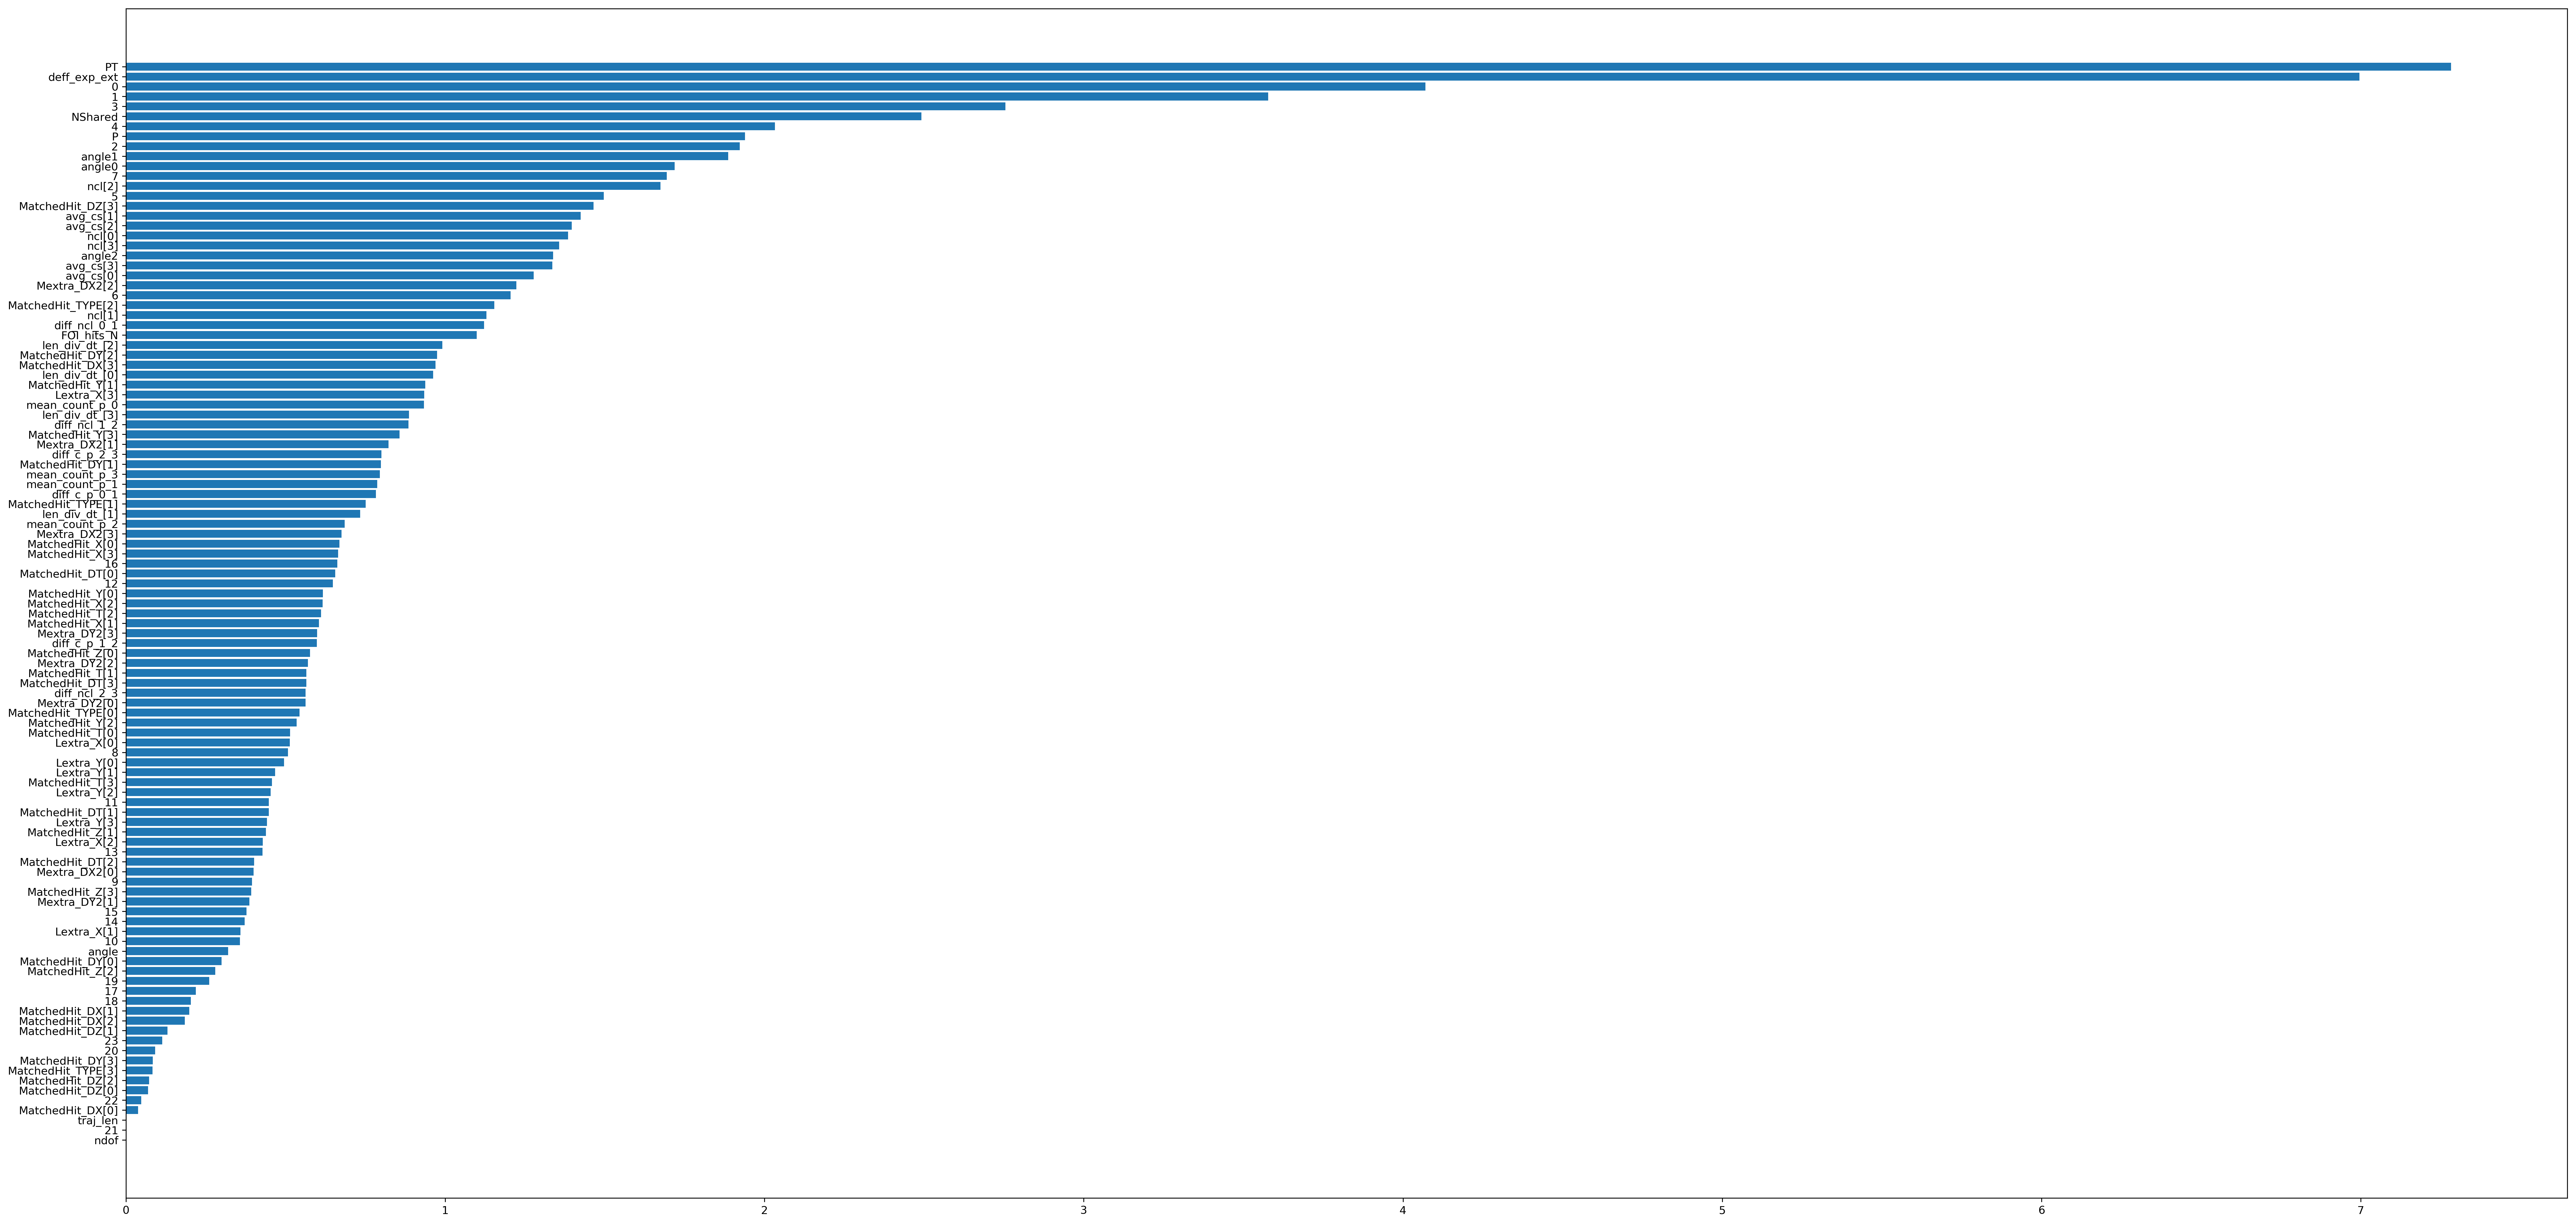

In [83]:
plot_importances_pipeline(model)

In [84]:
# model.steps[1][1].estimator.feature_names_

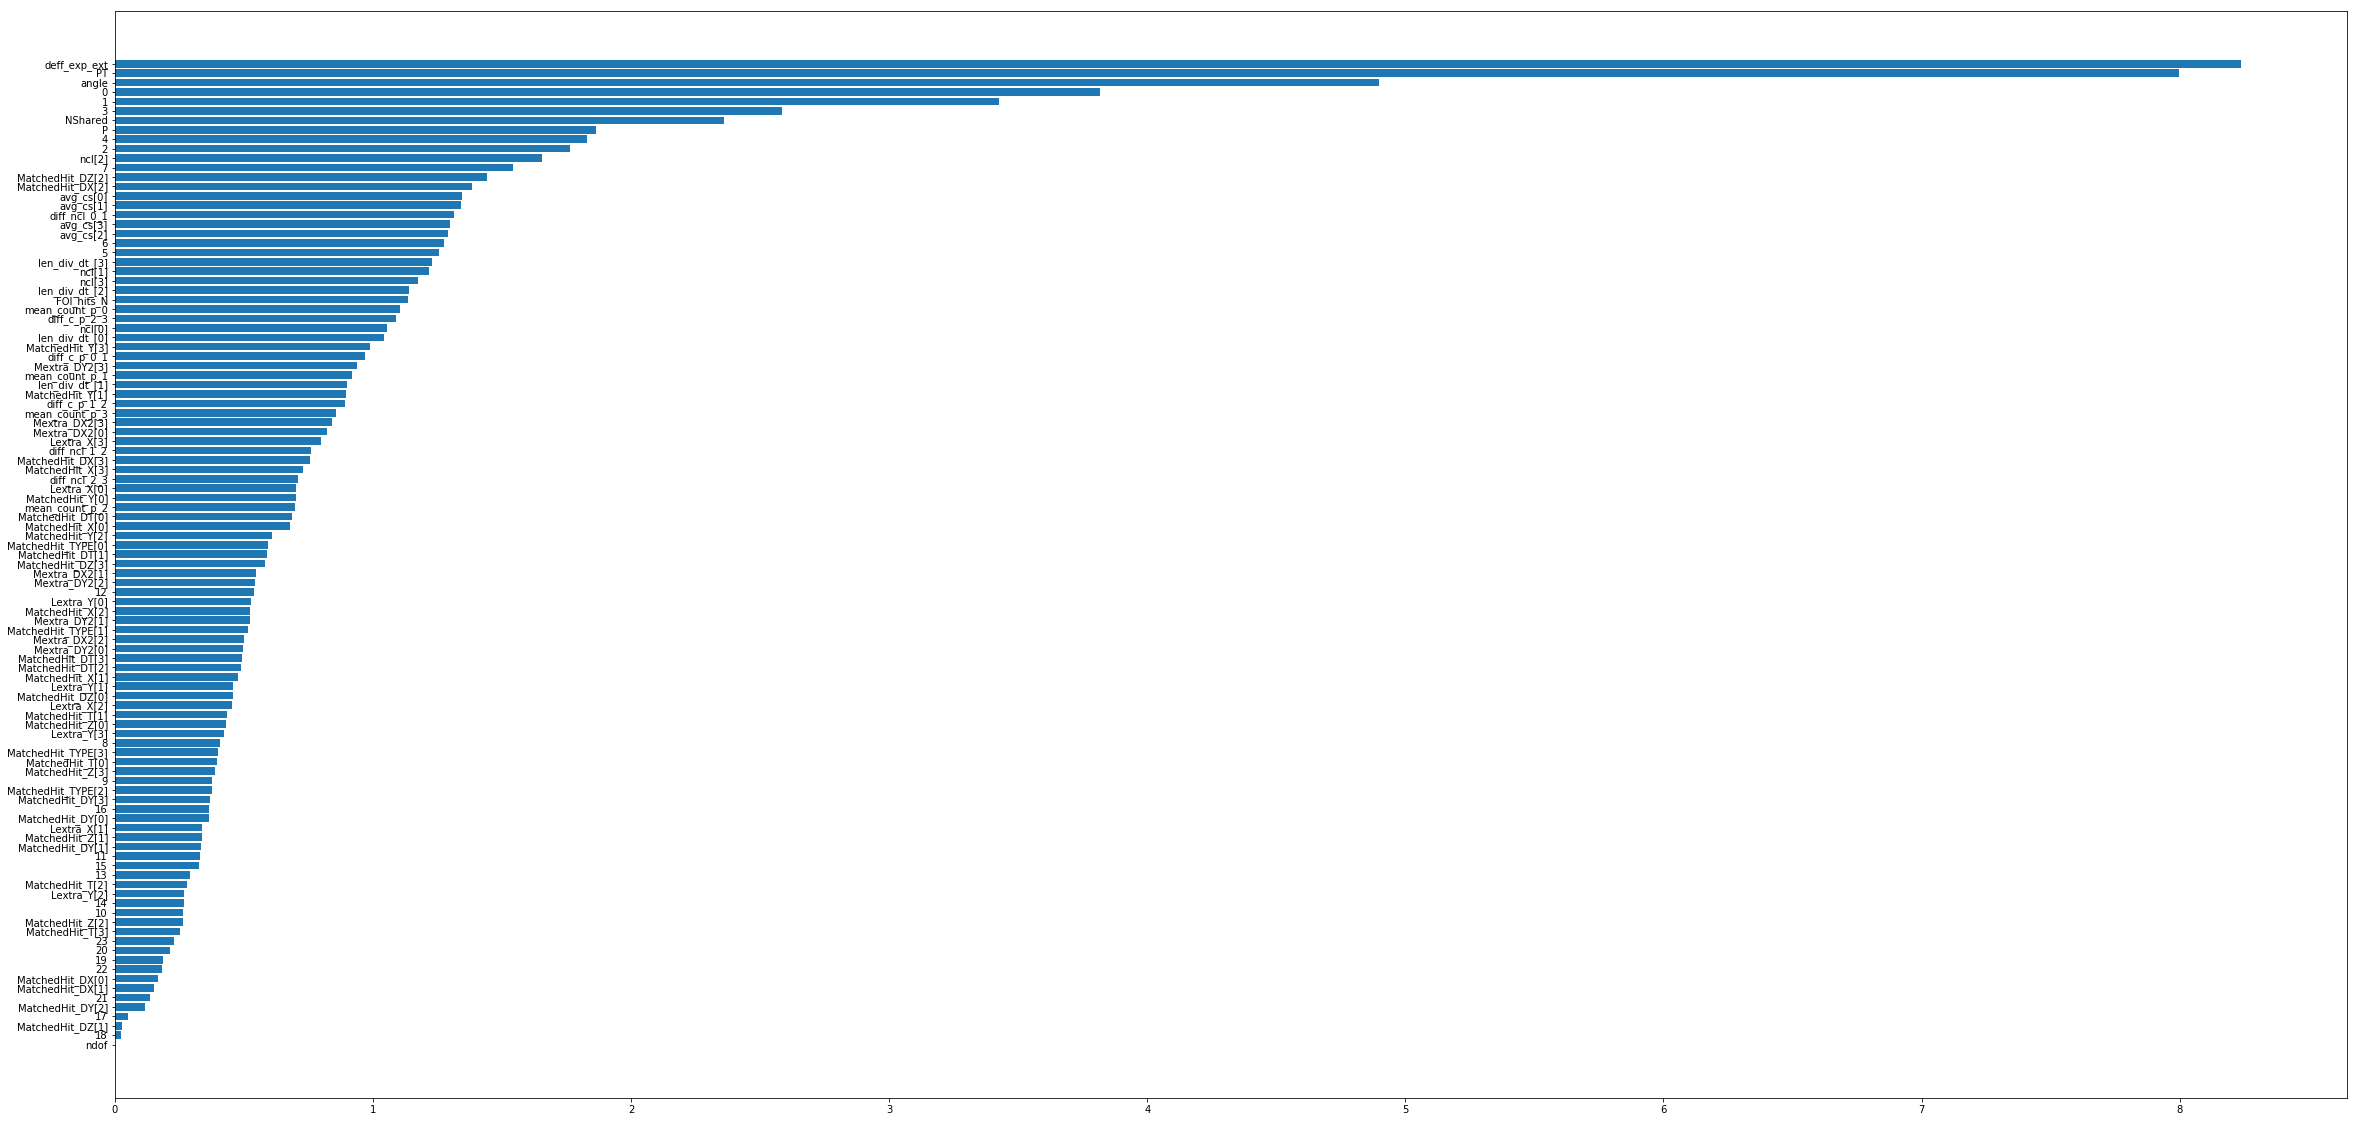

In [256]:
plot_importances_pipeline(model)

In [232]:
model.steps[1][1].estimator.feature_names_

['ncl[0]',
 'ncl[1]',
 'ncl[2]',
 'ncl[3]',
 'avg_cs[0]',
 'avg_cs[1]',
 'avg_cs[2]',
 'avg_cs[3]',
 'ndof',
 'MatchedHit_TYPE[0]',
 'MatchedHit_TYPE[1]',
 'MatchedHit_TYPE[2]',
 'MatchedHit_TYPE[3]',
 'MatchedHit_X[0]',
 'MatchedHit_X[1]',
 'MatchedHit_X[2]',
 'MatchedHit_X[3]',
 'MatchedHit_Y[0]',
 'MatchedHit_Y[1]',
 'MatchedHit_Y[2]',
 'MatchedHit_Y[3]',
 'MatchedHit_Z[0]',
 'MatchedHit_Z[1]',
 'MatchedHit_Z[2]',
 'MatchedHit_Z[3]',
 'MatchedHit_DX[0]',
 'MatchedHit_DX[1]',
 'MatchedHit_DX[2]',
 'MatchedHit_DX[3]',
 'MatchedHit_DY[0]',
 'MatchedHit_DY[1]',
 'MatchedHit_DY[2]',
 'MatchedHit_DY[3]',
 'MatchedHit_DZ[0]',
 'MatchedHit_DZ[1]',
 'MatchedHit_DZ[2]',
 'MatchedHit_DZ[3]',
 'MatchedHit_T[0]',
 'MatchedHit_T[1]',
 'MatchedHit_T[2]',
 'MatchedHit_T[3]',
 'MatchedHit_DT[0]',
 'MatchedHit_DT[1]',
 'MatchedHit_DT[2]',
 'MatchedHit_DT[3]',
 'Lextra_X[0]',
 'Lextra_X[1]',
 'Lextra_X[2]',
 'Lextra_X[3]',
 'Lextra_Y[0]',
 'Lextra_Y[1]',
 'Lextra_Y[2]',
 'Lextra_Y[3]',
 'NShared',
 'M

### FINAL fit-predict,  save submit on all data

In [246]:
%%time

features = list(df_train.keys())
features.remove('label')
# features.remove('weight')
for feat in ['particle_type', 'sWeight', 'kinWeight']:
    if feat in features:
        features.remove(feat)
        
target = ['label']

estimator = catboost.CatBoostClassifier(iterations=2000, max_depth=8, thread_count=32, verbose=True)
clf = ModelClass(estimator = estimator)
transformer = FeatureTransformer()

model = Pipeline([('transformer', transformer),
                  ('clf', clf)])

model.fit(df_train[features], df_train[target])

features.remove('weight')
predictions = model.predict_proba(df_test[features])[:, 1]
pd.DataFrame(data={"prediction": predictions}, index=df_test.index).to_csv(
    "/nis/idao/results/catboost_3_new_features_plus_advanced_baseline_2000iter.csv", index_label='id')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Collision with name angle
Collision with name deff_exp_ext
Collision with name len_div_dt_[0]
Collision with name len_div_dt_[1]
Collision with name len_div_dt_[2]
Collision with name len_div_dt_[3]
Collision with name mean_count_p_0
Collision with name mean_count_p_1
Collision with name mean_count_p_2
Collision with name mean_count_p_3
Collision with name diff_c_p_0_1
Collision with name diff_c_p_1_2
Collision with name diff_c_p_2_3
Collision with name diff_ncl_0_1
Collision with name diff_ncl_1_2
Collision with name diff_ncl_2_3
fitting, using weight


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.103088
0:	learn: 0.6557990	total: 837ms	remaining: 27m 52s
1:	learn: 0.6286513	total: 1.57s	remaining: 26m 13s
2:	learn: 0.6087884	total: 2.27s	remaining: 25m 9s
3:	learn: 0.5909769	total: 3.04s	remaining: 25m 15s
4:	learn: 0.5756416	total: 3.74s	remaining: 24m 51s
5:	learn: 0.5634524	total: 4.41s	remaining: 24m 24s
6:	learn: 0.5538658	total: 5.2s	remaining: 24m 40s
7:	learn: 0.5471332	total: 5.91s	remaining: 24m 32s
8:	learn: 0.5395102	total: 6.6s	remaining: 24m 20s
9:	learn: 0.5336526	total: 7.25s	remaining: 24m 1s
10:	learn: 0.5288643	total: 7.93s	remaining: 23m 54s
11:	learn: 0.5238353	total: 8.69s	remaining: 23m 59s
12:	learn: 0.5201098	total: 9.43s	remaining: 24m 1s
13:	learn: 0.5168593	total: 10.1s	remaining: 23m 50s
14:	learn: 0.5140295	total: 10.7s	remaining: 23m 38s
15:	learn: 0.5114579	total: 11.4s	remaining: 23m 30s
16:	learn: 0.5081142	total: 12.1s	remaining: 23m 30s
17:	learn: 0.5054767	total: 12.8s	remaining: 23m 28s
18:	learn: 0.5032058	total: 13.

153:	learn: 0.4544456	total: 1m 43s	remaining: 20m 43s
154:	learn: 0.4541665	total: 1m 44s	remaining: 20m 43s
155:	learn: 0.4540035	total: 1m 45s	remaining: 20m 42s
156:	learn: 0.4538913	total: 1m 45s	remaining: 20m 40s
157:	learn: 0.4537589	total: 1m 46s	remaining: 20m 39s
158:	learn: 0.4533836	total: 1m 47s	remaining: 20m 39s
159:	learn: 0.4531475	total: 1m 47s	remaining: 20m 38s
160:	learn: 0.4529516	total: 1m 48s	remaining: 20m 39s
161:	learn: 0.4528372	total: 1m 49s	remaining: 20m 37s
162:	learn: 0.4526646	total: 1m 49s	remaining: 20m 36s
163:	learn: 0.4525351	total: 1m 50s	remaining: 20m 35s
164:	learn: 0.4522681	total: 1m 51s	remaining: 20m 35s
165:	learn: 0.4521343	total: 1m 51s	remaining: 20m 34s
166:	learn: 0.4518920	total: 1m 52s	remaining: 20m 33s
167:	learn: 0.4517664	total: 1m 53s	remaining: 20m 34s
168:	learn: 0.4515576	total: 1m 53s	remaining: 20m 34s
169:	learn: 0.4514168	total: 1m 54s	remaining: 20m 34s
170:	learn: 0.4513101	total: 1m 55s	remaining: 20m 33s
171:	learn

304:	learn: 0.4307752	total: 3m 27s	remaining: 19m 15s
305:	learn: 0.4305400	total: 3m 28s	remaining: 19m 14s
306:	learn: 0.4304262	total: 3m 29s	remaining: 19m 14s
307:	learn: 0.4303248	total: 3m 29s	remaining: 19m 13s
308:	learn: 0.4302107	total: 3m 30s	remaining: 19m 12s
309:	learn: 0.4300682	total: 3m 31s	remaining: 19m 12s
310:	learn: 0.4299645	total: 3m 32s	remaining: 19m 11s
311:	learn: 0.4298488	total: 3m 32s	remaining: 19m 10s
312:	learn: 0.4297144	total: 3m 33s	remaining: 19m 10s
313:	learn: 0.4295760	total: 3m 34s	remaining: 19m 10s
314:	learn: 0.4294876	total: 3m 34s	remaining: 19m 9s
315:	learn: 0.4293659	total: 3m 35s	remaining: 19m 8s
316:	learn: 0.4292659	total: 3m 36s	remaining: 19m 7s
317:	learn: 0.4291788	total: 3m 36s	remaining: 19m 6s
318:	learn: 0.4290472	total: 3m 37s	remaining: 19m 6s
319:	learn: 0.4289472	total: 3m 38s	remaining: 19m 5s
320:	learn: 0.4288411	total: 3m 38s	remaining: 19m 4s
321:	learn: 0.4287372	total: 3m 39s	remaining: 19m 4s
322:	learn: 0.4286

455:	learn: 0.4135354	total: 5m 13s	remaining: 17m 40s
456:	learn: 0.4134060	total: 5m 13s	remaining: 17m 39s
457:	learn: 0.4133141	total: 5m 14s	remaining: 17m 38s
458:	learn: 0.4131948	total: 5m 15s	remaining: 17m 38s
459:	learn: 0.4130746	total: 5m 15s	remaining: 17m 37s
460:	learn: 0.4129348	total: 5m 16s	remaining: 17m 36s
461:	learn: 0.4128295	total: 5m 17s	remaining: 17m 36s
462:	learn: 0.4127202	total: 5m 18s	remaining: 17m 35s
463:	learn: 0.4126071	total: 5m 18s	remaining: 17m 35s
464:	learn: 0.4125344	total: 5m 19s	remaining: 17m 34s
465:	learn: 0.4123893	total: 5m 20s	remaining: 17m 33s
466:	learn: 0.4122511	total: 5m 20s	remaining: 17m 33s
467:	learn: 0.4121557	total: 5m 21s	remaining: 17m 32s
468:	learn: 0.4120534	total: 5m 22s	remaining: 17m 32s
469:	learn: 0.4119340	total: 5m 23s	remaining: 17m 31s
470:	learn: 0.4118157	total: 5m 23s	remaining: 17m 30s
471:	learn: 0.4117114	total: 5m 24s	remaining: 17m 30s
472:	learn: 0.4116483	total: 5m 25s	remaining: 17m 29s
473:	learn

605:	learn: 0.3989038	total: 6m 58s	remaining: 16m 3s
606:	learn: 0.3987964	total: 6m 59s	remaining: 16m 3s
607:	learn: 0.3986844	total: 7m	remaining: 16m 2s
608:	learn: 0.3986219	total: 7m 1s	remaining: 16m 1s
609:	learn: 0.3985456	total: 7m 2s	remaining: 16m 1s
610:	learn: 0.3984696	total: 7m 2s	remaining: 16m
611:	learn: 0.3984028	total: 7m 3s	remaining: 16m
612:	learn: 0.3983574	total: 7m 3s	remaining: 15m 59s
613:	learn: 0.3982943	total: 7m 4s	remaining: 15m 58s
614:	learn: 0.3982177	total: 7m 5s	remaining: 15m 57s
615:	learn: 0.3981313	total: 7m 5s	remaining: 15m 56s
616:	learn: 0.3980399	total: 7m 6s	remaining: 15m 56s
617:	learn: 0.3979422	total: 7m 7s	remaining: 15m 55s
618:	learn: 0.3978282	total: 7m 8s	remaining: 15m 55s
619:	learn: 0.3977338	total: 7m 8s	remaining: 15m 54s
620:	learn: 0.3976489	total: 7m 9s	remaining: 15m 53s
621:	learn: 0.3975417	total: 7m 10s	remaining: 15m 53s
622:	learn: 0.3974717	total: 7m 11s	remaining: 15m 52s
623:	learn: 0.3973924	total: 7m 11s	rema

756:	learn: 0.3861637	total: 8m 46s	remaining: 14m 25s
757:	learn: 0.3860887	total: 8m 47s	remaining: 14m 24s
758:	learn: 0.3860266	total: 8m 48s	remaining: 14m 23s
759:	learn: 0.3859764	total: 8m 49s	remaining: 14m 23s
760:	learn: 0.3858824	total: 8m 49s	remaining: 14m 22s
761:	learn: 0.3858246	total: 8m 50s	remaining: 14m 21s
762:	learn: 0.3857273	total: 8m 51s	remaining: 14m 21s
763:	learn: 0.3856864	total: 8m 51s	remaining: 14m 20s
764:	learn: 0.3856120	total: 8m 52s	remaining: 14m 19s
765:	learn: 0.3855666	total: 8m 53s	remaining: 14m 19s
766:	learn: 0.3855071	total: 8m 53s	remaining: 14m 18s
767:	learn: 0.3854262	total: 8m 54s	remaining: 14m 17s
768:	learn: 0.3853522	total: 8m 55s	remaining: 14m 16s
769:	learn: 0.3852572	total: 8m 56s	remaining: 14m 16s
770:	learn: 0.3851865	total: 8m 56s	remaining: 14m 15s
771:	learn: 0.3850672	total: 8m 57s	remaining: 14m 15s
772:	learn: 0.3849368	total: 8m 58s	remaining: 14m 14s
773:	learn: 0.3848568	total: 8m 59s	remaining: 14m 13s
774:	learn

906:	learn: 0.3749559	total: 10m 36s	remaining: 12m 46s
907:	learn: 0.3748816	total: 10m 36s	remaining: 12m 45s
908:	learn: 0.3747980	total: 10m 37s	remaining: 12m 45s
909:	learn: 0.3747212	total: 10m 38s	remaining: 12m 44s
910:	learn: 0.3746444	total: 10m 39s	remaining: 12m 44s
911:	learn: 0.3745578	total: 10m 40s	remaining: 12m 43s
912:	learn: 0.3745056	total: 10m 40s	remaining: 12m 42s
913:	learn: 0.3744310	total: 10m 41s	remaining: 12m 42s
914:	learn: 0.3743958	total: 10m 42s	remaining: 12m 41s
915:	learn: 0.3743259	total: 10m 42s	remaining: 12m 40s
916:	learn: 0.3742545	total: 10m 43s	remaining: 12m 40s
917:	learn: 0.3741625	total: 10m 44s	remaining: 12m 39s
918:	learn: 0.3740712	total: 10m 45s	remaining: 12m 38s
919:	learn: 0.3740006	total: 10m 46s	remaining: 12m 38s
920:	learn: 0.3739306	total: 10m 46s	remaining: 12m 37s
921:	learn: 0.3738561	total: 10m 47s	remaining: 12m 37s
922:	learn: 0.3738051	total: 10m 48s	remaining: 12m 36s
923:	learn: 0.3737243	total: 10m 49s	remaining: 

1053:	learn: 0.3646960	total: 12m 26s	remaining: 11m 9s
1054:	learn: 0.3646457	total: 12m 26s	remaining: 11m 8s
1055:	learn: 0.3645870	total: 12m 27s	remaining: 11m 8s
1056:	learn: 0.3645193	total: 12m 28s	remaining: 11m 7s
1057:	learn: 0.3644681	total: 12m 28s	remaining: 11m 6s
1058:	learn: 0.3644042	total: 12m 29s	remaining: 11m 6s
1059:	learn: 0.3643493	total: 12m 30s	remaining: 11m 5s
1060:	learn: 0.3642678	total: 12m 31s	remaining: 11m 4s
1061:	learn: 0.3641940	total: 12m 32s	remaining: 11m 4s
1062:	learn: 0.3641117	total: 12m 32s	remaining: 11m 3s
1063:	learn: 0.3640416	total: 12m 33s	remaining: 11m 2s
1064:	learn: 0.3639809	total: 12m 34s	remaining: 11m 2s
1065:	learn: 0.3639107	total: 12m 35s	remaining: 11m 1s
1066:	learn: 0.3638537	total: 12m 35s	remaining: 11m
1067:	learn: 0.3637906	total: 12m 36s	remaining: 11m
1068:	learn: 0.3637347	total: 12m 37s	remaining: 10m 59s
1069:	learn: 0.3636827	total: 12m 37s	remaining: 10m 58s
1070:	learn: 0.3636268	total: 12m 38s	remaining: 10m

1199:	learn: 0.3556844	total: 14m 15s	remaining: 9m 30s
1200:	learn: 0.3556443	total: 14m 16s	remaining: 9m 29s
1201:	learn: 0.3555674	total: 14m 16s	remaining: 9m 28s
1202:	learn: 0.3555036	total: 14m 17s	remaining: 9m 28s
1203:	learn: 0.3554375	total: 14m 18s	remaining: 9m 27s
1204:	learn: 0.3553796	total: 14m 19s	remaining: 9m 26s
1205:	learn: 0.3553190	total: 14m 19s	remaining: 9m 26s
1206:	learn: 0.3552291	total: 14m 20s	remaining: 9m 25s
1207:	learn: 0.3551680	total: 14m 21s	remaining: 9m 24s
1208:	learn: 0.3550948	total: 14m 22s	remaining: 9m 24s
1209:	learn: 0.3550326	total: 14m 22s	remaining: 9m 23s
1210:	learn: 0.3549790	total: 14m 23s	remaining: 9m 22s
1211:	learn: 0.3549116	total: 14m 24s	remaining: 9m 21s
1212:	learn: 0.3548582	total: 14m 25s	remaining: 9m 21s
1213:	learn: 0.3547946	total: 14m 25s	remaining: 9m 20s
1214:	learn: 0.3547467	total: 14m 26s	remaining: 9m 19s
1215:	learn: 0.3547051	total: 14m 27s	remaining: 9m 19s
1216:	learn: 0.3546506	total: 14m 27s	remaining:

1347:	learn: 0.3474045	total: 16m 2s	remaining: 7m 45s
1348:	learn: 0.3473419	total: 16m 3s	remaining: 7m 44s
1349:	learn: 0.3472942	total: 16m 4s	remaining: 7m 44s
1350:	learn: 0.3472593	total: 16m 4s	remaining: 7m 43s
1351:	learn: 0.3472123	total: 16m 5s	remaining: 7m 42s
1352:	learn: 0.3471485	total: 16m 6s	remaining: 7m 42s
1353:	learn: 0.3470807	total: 16m 7s	remaining: 7m 41s
1354:	learn: 0.3470353	total: 16m 8s	remaining: 7m 40s
1355:	learn: 0.3470023	total: 16m 8s	remaining: 7m 40s
1356:	learn: 0.3469301	total: 16m 9s	remaining: 7m 39s
1357:	learn: 0.3468760	total: 16m 10s	remaining: 7m 38s
1358:	learn: 0.3468285	total: 16m 10s	remaining: 7m 37s
1359:	learn: 0.3467742	total: 16m 11s	remaining: 7m 37s
1360:	learn: 0.3467368	total: 16m 12s	remaining: 7m 36s
1361:	learn: 0.3466735	total: 16m 12s	remaining: 7m 35s
1362:	learn: 0.3466001	total: 16m 13s	remaining: 7m 35s
1363:	learn: 0.3465277	total: 16m 14s	remaining: 7m 34s
1364:	learn: 0.3464710	total: 16m 15s	remaining: 7m 33s
13

1495:	learn: 0.3395167	total: 17m 51s	remaining: 6m
1496:	learn: 0.3394483	total: 17m 52s	remaining: 6m
1497:	learn: 0.3394045	total: 17m 52s	remaining: 5m 59s
1498:	learn: 0.3393607	total: 17m 53s	remaining: 5m 58s
1499:	learn: 0.3393129	total: 17m 54s	remaining: 5m 58s
1500:	learn: 0.3392702	total: 17m 55s	remaining: 5m 57s
1501:	learn: 0.3392143	total: 17m 55s	remaining: 5m 56s
1502:	learn: 0.3391574	total: 17m 56s	remaining: 5m 56s
1503:	learn: 0.3391147	total: 17m 57s	remaining: 5m 55s
1504:	learn: 0.3390496	total: 17m 58s	remaining: 5m 54s
1505:	learn: 0.3389828	total: 17m 58s	remaining: 5m 53s
1506:	learn: 0.3389326	total: 17m 59s	remaining: 5m 53s
1507:	learn: 0.3388834	total: 18m	remaining: 5m 52s
1508:	learn: 0.3388487	total: 18m 1s	remaining: 5m 51s
1509:	learn: 0.3388178	total: 18m 1s	remaining: 5m 51s
1510:	learn: 0.3387806	total: 18m 2s	remaining: 5m 50s
1511:	learn: 0.3387333	total: 18m 3s	remaining: 5m 49s
1512:	learn: 0.3386811	total: 18m 3s	remaining: 5m 48s
1513:	lea

1643:	learn: 0.3322389	total: 19m 39s	remaining: 4m 15s
1644:	learn: 0.3321985	total: 19m 40s	remaining: 4m 14s
1645:	learn: 0.3321468	total: 19m 41s	remaining: 4m 14s
1646:	learn: 0.3321142	total: 19m 41s	remaining: 4m 13s
1647:	learn: 0.3320665	total: 19m 42s	remaining: 4m 12s
1648:	learn: 0.3320097	total: 19m 43s	remaining: 4m 11s
1649:	learn: 0.3319602	total: 19m 44s	remaining: 4m 11s
1650:	learn: 0.3319314	total: 19m 44s	remaining: 4m 10s
1651:	learn: 0.3318897	total: 19m 45s	remaining: 4m 9s
1652:	learn: 0.3318514	total: 19m 46s	remaining: 4m 9s
1653:	learn: 0.3317868	total: 19m 46s	remaining: 4m 8s
1654:	learn: 0.3317320	total: 19m 47s	remaining: 4m 7s
1655:	learn: 0.3316891	total: 19m 48s	remaining: 4m 6s
1656:	learn: 0.3316411	total: 19m 49s	remaining: 4m 6s
1657:	learn: 0.3315896	total: 19m 50s	remaining: 4m 5s
1658:	learn: 0.3315539	total: 19m 50s	remaining: 4m 4s
1659:	learn: 0.3315049	total: 19m 51s	remaining: 4m 4s
1660:	learn: 0.3314550	total: 19m 52s	remaining: 4m 3s
16

1791:	learn: 0.3253753	total: 21m 28s	remaining: 2m 29s
1792:	learn: 0.3253141	total: 21m 29s	remaining: 2m 28s
1793:	learn: 0.3252798	total: 21m 30s	remaining: 2m 28s
1794:	learn: 0.3252385	total: 21m 30s	remaining: 2m 27s
1795:	learn: 0.3251949	total: 21m 31s	remaining: 2m 26s
1796:	learn: 0.3251476	total: 21m 32s	remaining: 2m 25s
1797:	learn: 0.3251047	total: 21m 33s	remaining: 2m 25s
1798:	learn: 0.3250559	total: 21m 33s	remaining: 2m 24s
1799:	learn: 0.3250209	total: 21m 34s	remaining: 2m 23s
1800:	learn: 0.3249731	total: 21m 35s	remaining: 2m 23s
1801:	learn: 0.3249018	total: 21m 36s	remaining: 2m 22s
1802:	learn: 0.3248504	total: 21m 36s	remaining: 2m 21s
1803:	learn: 0.3248115	total: 21m 37s	remaining: 2m 20s
1804:	learn: 0.3247556	total: 21m 38s	remaining: 2m 20s
1805:	learn: 0.3247226	total: 21m 39s	remaining: 2m 19s
1806:	learn: 0.3246713	total: 21m 39s	remaining: 2m 18s
1807:	learn: 0.3246486	total: 21m 40s	remaining: 2m 18s
1808:	learn: 0.3246077	total: 21m 41s	remaining:

1940:	learn: 0.3188999	total: 23m 18s	remaining: 42.5s
1941:	learn: 0.3188534	total: 23m 19s	remaining: 41.8s
1942:	learn: 0.3188098	total: 23m 20s	remaining: 41.1s
1943:	learn: 0.3187582	total: 23m 20s	remaining: 40.4s
1944:	learn: 0.3187207	total: 23m 21s	remaining: 39.6s
1945:	learn: 0.3186839	total: 23m 22s	remaining: 38.9s
1946:	learn: 0.3186366	total: 23m 23s	remaining: 38.2s
1947:	learn: 0.3185894	total: 23m 24s	remaining: 37.5s
1948:	learn: 0.3185525	total: 23m 24s	remaining: 36.8s
1949:	learn: 0.3185006	total: 23m 25s	remaining: 36s
1950:	learn: 0.3184508	total: 23m 26s	remaining: 35.3s
1951:	learn: 0.3184085	total: 23m 27s	remaining: 34.6s
1952:	learn: 0.3183780	total: 23m 27s	remaining: 33.9s
1953:	learn: 0.3183395	total: 23m 28s	remaining: 33.2s
1954:	learn: 0.3183061	total: 23m 29s	remaining: 32.4s
1955:	learn: 0.3182669	total: 23m 29s	remaining: 31.7s
1956:	learn: 0.3182218	total: 23m 30s	remaining: 31s
1957:	learn: 0.3181912	total: 23m 31s	remaining: 30.3s
1958:	learn: 0

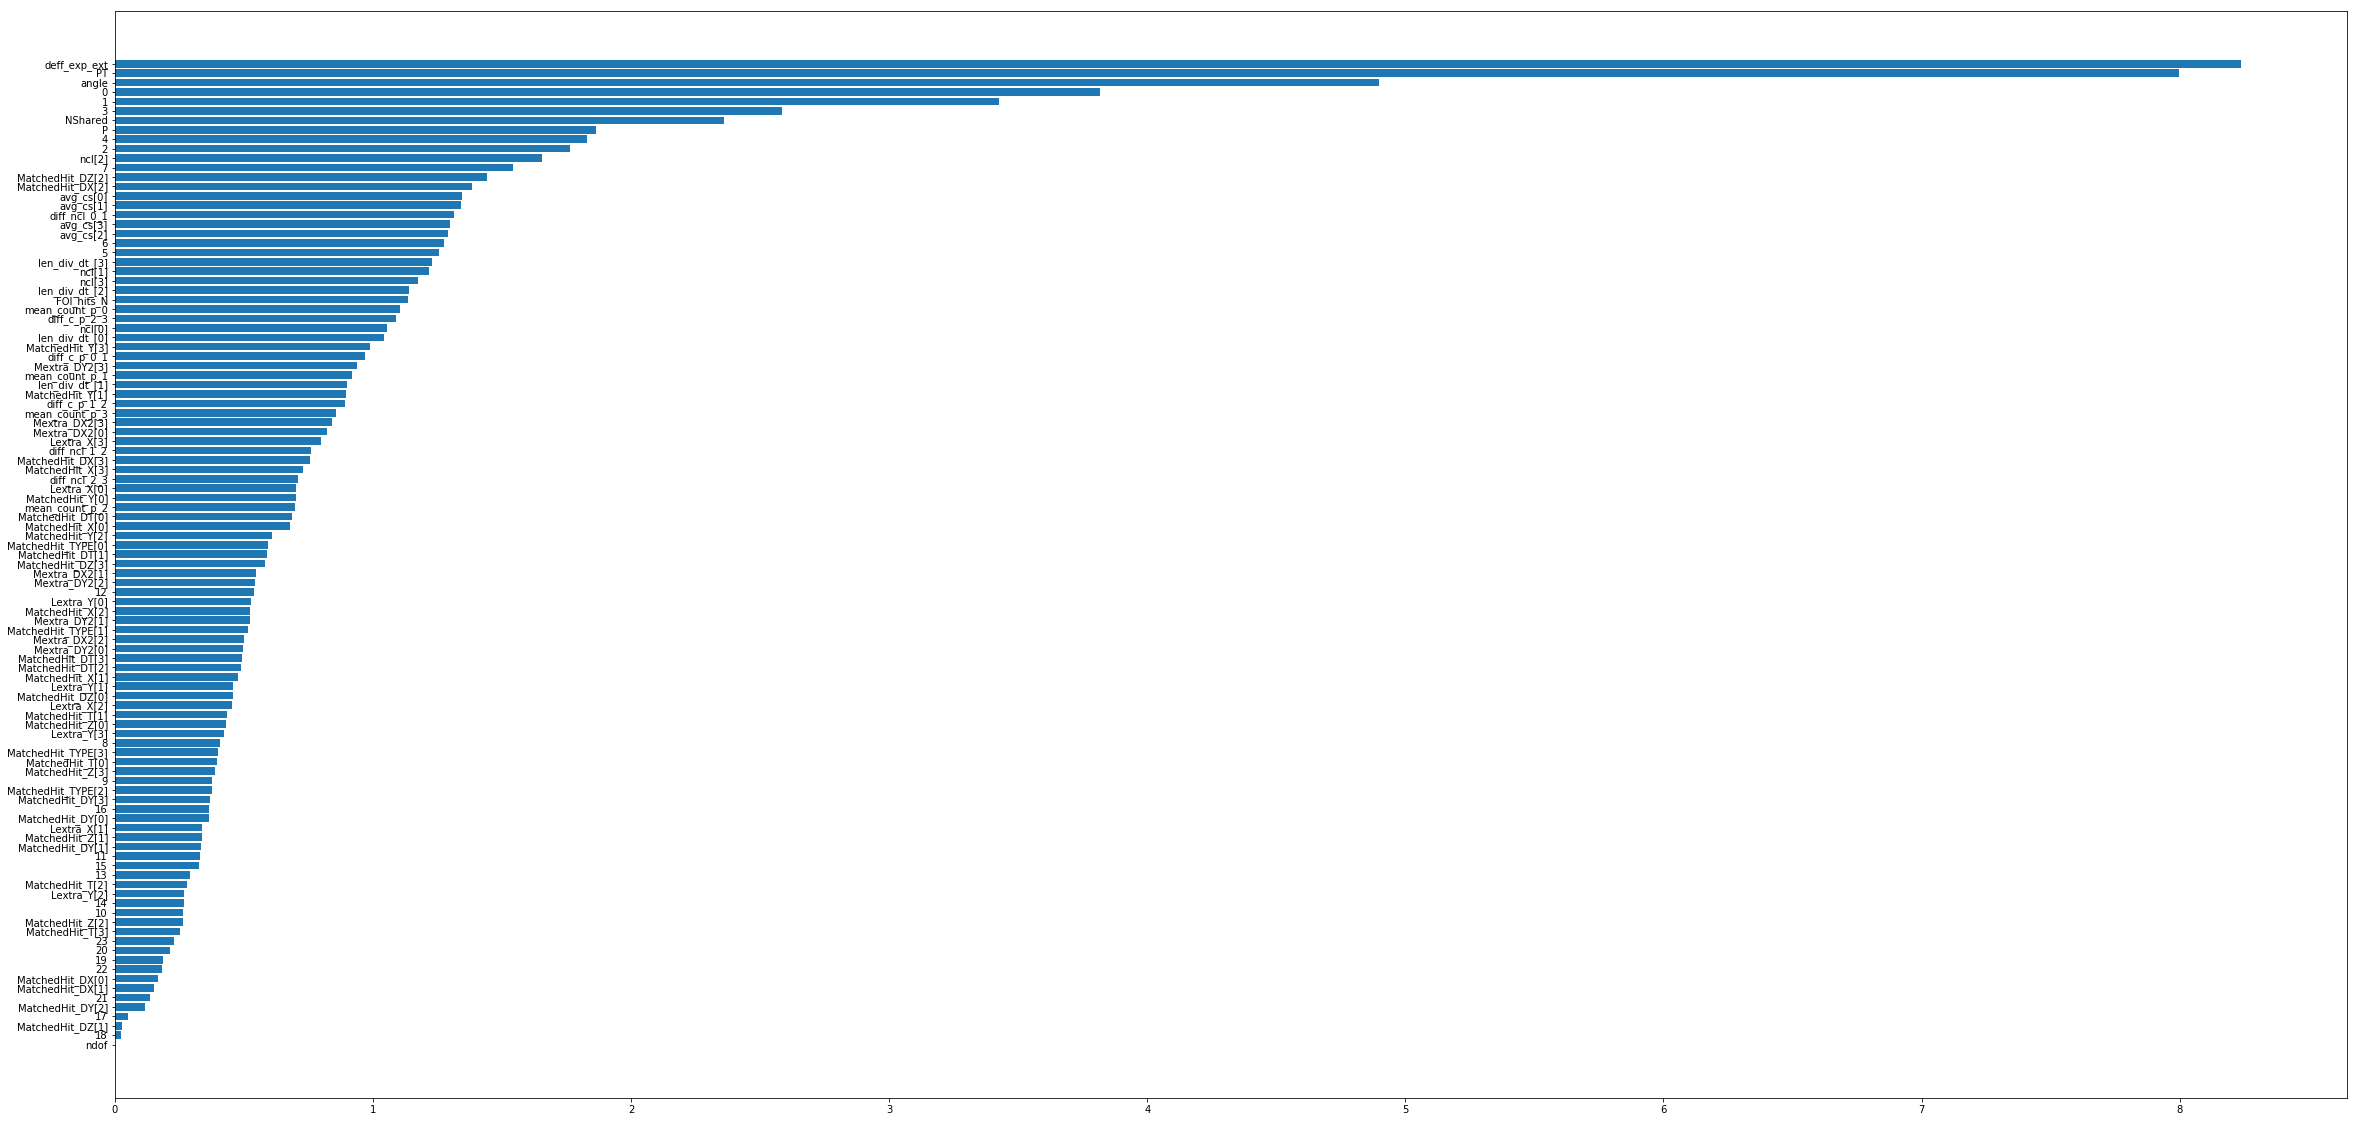

In [251]:
plot_importances_pipeline(model)

In [252]:
def features_by_importances_pipeline(model, thr=1):
    return [k for k, v in zip(model.steps[1][1].estimator.feature_names_,
                                     model.steps[1][1].estimator.feature_importances_) if v > thr]

leave_features = features_by_importances_pipeline(model)
print(leave_features, len(leave_features))

['ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]', 'avg_cs[2]', 'avg_cs[3]', 'MatchedHit_DX[2]', 'MatchedHit_DZ[2]', 'NShared', 'FOI_hits_N', 'PT', 'P', '0', '1', '2', '3', '4', '5', '6', '7', 'angle', 'deff_exp_ext', 'len_div_dt_[0]', 'len_div_dt_[2]', 'len_div_dt_[3]', 'mean_count_p_0', 'diff_c_p_2_3', 'diff_ncl_0_1'] 30


In [ ]:
# features.remove('weight')
# features.remove('kinWeight')

In [63]:
predictions = model.predict_proba(df_test[features])[:, 1]
pd.DataFrame(data={"prediction": predictions}, index=df_test.index).to_csv(
    "/nis/idao/results/catboost_all_features_5feb.csv", index_label='id')

In [248]:
### local not correct validation ###
y_predict_proba = model.predict_proba(df_validation[features])[:, 1]
y_predict = model.predict(df_validation[features])

print(classification_report(y_predict, df_validation.label.values))
print('rejection90:\t', str(scoring.rejection90(df_validation.label.values, 
                                                y_predict_proba, 
                                                sample_weight=df_validation.weight.values)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Collision with name angle
Collision with name deff_exp_ext
Collision with name len_div_dt_[0]
Collision with name len_div_dt_[1]
Collision with name len_div_dt_[2]
Collision with name len_div_dt_[3]
Collision with name mean_count_p_0
Collision with name mean_count_p_1
Collision with name mean_count_p_2
Collision with name mean_count_p_3
Collision with name diff_c_p_0_1
Collision with name diff_c_p_1_2
Collision with name diff_c_p_2_3
Collision with name diff_ncl_0_1
Collision with name diff_ncl_1_2
Collision with name diff_ncl_2_3
Collision with name angle
Collision with name deff_exp_ext
Collision with name len_div_dt_[0]
Collision with name len_div_dt_[1]
Collision with name len_div_dt_[2]
Collision with name len_div_dt_[3]
Collision with name mean_count_p_0
Collision with name mean_count_p_1
Collision with name mean_count_p_2
Collision with name mean_count_p_3
Collision with name diff_c_p_0_1
Collision with name diff_c_p_1_2
Collision with name diff_c_p_2_3
Collision with name diff_

In [236]:
# features

In [237]:
# model.steps[1][1].estimator.feature_names_

In [128]:
### local not correct validation ###
y_predict_proba = model.predict_proba(df_validation[features])[:, 1]
y_predict = model.predict(df_validation[features])

print(classification_report(y_predict, df_validation.label.values))
print('rejection90:\t', str(scoring.rejection90(df_validation.label.values, 
                                                y_predict_proba, 
                                                sample_weight=df_validation.weight.values)))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             precision    recall  f1-score   support

        0.0       0.76      0.29      0.42    273374
        1.0       0.85      0.98      0.91   1088053

avg / total       0.83      0.84      0.81   1361427

rejection90:	 0.9151348841119508


In [32]:
# # model.steps[0][1].SIMPLE_FEATURES.remove('weight')
# predictions = model.predict_proba(df_test)[:, 1]
# pd.DataFrame(data={"prediction": predictions}, index=df_test.index).to_csv(
#     "/nis/idao/results/xgb_3_new_features_plus_advanced_baseline.csv", index_label='id')

In [57]:
print('FINISH')

FINISH


In [ ]:
# scoring.rejection90(df_validation.label.values, y_predicted, sample_weight=df_validation.weight.values)

#### RESULTS:
    ====[  2  ]=============================================================
    all numeric features + 3 feature + xgb with our metric  [03.02.18 21:39]


         precision    recall  f1-score   support

              0       0.72      0.19      0.30    408686
              1       0.74      0.97      0.84    952741

    avg / total       0.73      0.73      0.67   1361427

    rejection90:	 0.7001187352573887
    ====[  1  ]=============================================================
    all numeric features + xgb with out weights  [03.02.18 20:35]
                   precision    recall  f1-score   support

              0       0.28      0.70      0.40     42814
              1       0.99      0.94      0.97   1318613

    avg / total       0.97      0.94      0.95   1361427

    rejection90:	 0.47724133495185816
    ====[  0  ]==============================================================
    all numeric features + xgb with weights  [03.02.18 20:30]

               precision    recall  f1-score   support

          0       0.71      0.13      0.22    567329
          1       0.61      0.96      0.74    794098

    avg / total       0.65      0.62      0.53   1361427

    rejection90:	 0.5487125090232358
    

## FEATURE IMPORTANCE

In [30]:
features = list(df_train.keys())
features.remove('label')
# features.remove('weight')
features.remove('particle_type')
target = ['label']

Index(['id', 'ncl[0]', 'ncl[1]', 'ncl[2]', 'ncl[3]', 'avg_cs[0]', 'avg_cs[1]',
       'avg_cs[2]', 'avg_cs[3]', 'ndof', 'MatchedHit_TYPE[0]',
       'MatchedHit_TYPE[1]', 'MatchedHit_TYPE[2]', 'MatchedHit_TYPE[3]',
       'MatchedHit_X[0]', 'MatchedHit_X[1]', 'MatchedHit_X[2]',
       'MatchedHit_X[3]', 'MatchedHit_Y[0]', 'MatchedHit_Y[1]',
       'MatchedHit_Y[2]', 'MatchedHit_Y[3]', 'MatchedHit_Z[0]',
       'MatchedHit_Z[1]', 'MatchedHit_Z[2]', 'MatchedHit_Z[3]',
       'MatchedHit_DX[0]', 'MatchedHit_DX[1]', 'MatchedHit_DX[2]',
       'MatchedHit_DX[3]', 'MatchedHit_DY[0]', 'MatchedHit_DY[1]',
       'MatchedHit_DY[2]', 'MatchedHit_DY[3]', 'MatchedHit_DZ[0]',
       'MatchedHit_DZ[1]', 'MatchedHit_DZ[2]', 'MatchedHit_DZ[3]',
       'MatchedHit_T[0]', 'MatchedHit_T[1]', 'MatchedHit_T[2]',
       'MatchedHit_T[3]', 'MatchedHit_DT[0]', 'MatchedHit_DT[1]',
       'MatchedHit_DT[2]', 'MatchedHit_DT[3]', 'Lextra_X[0]', 'Lextra_X[1]',
       'Lextra_X[2]', 'Lextra_X[3]', 'Lextra_Y[0]', 'L

In [48]:
import pickle
pickle.dump(model, open('../results/model3feature.pickle', 'wb'))

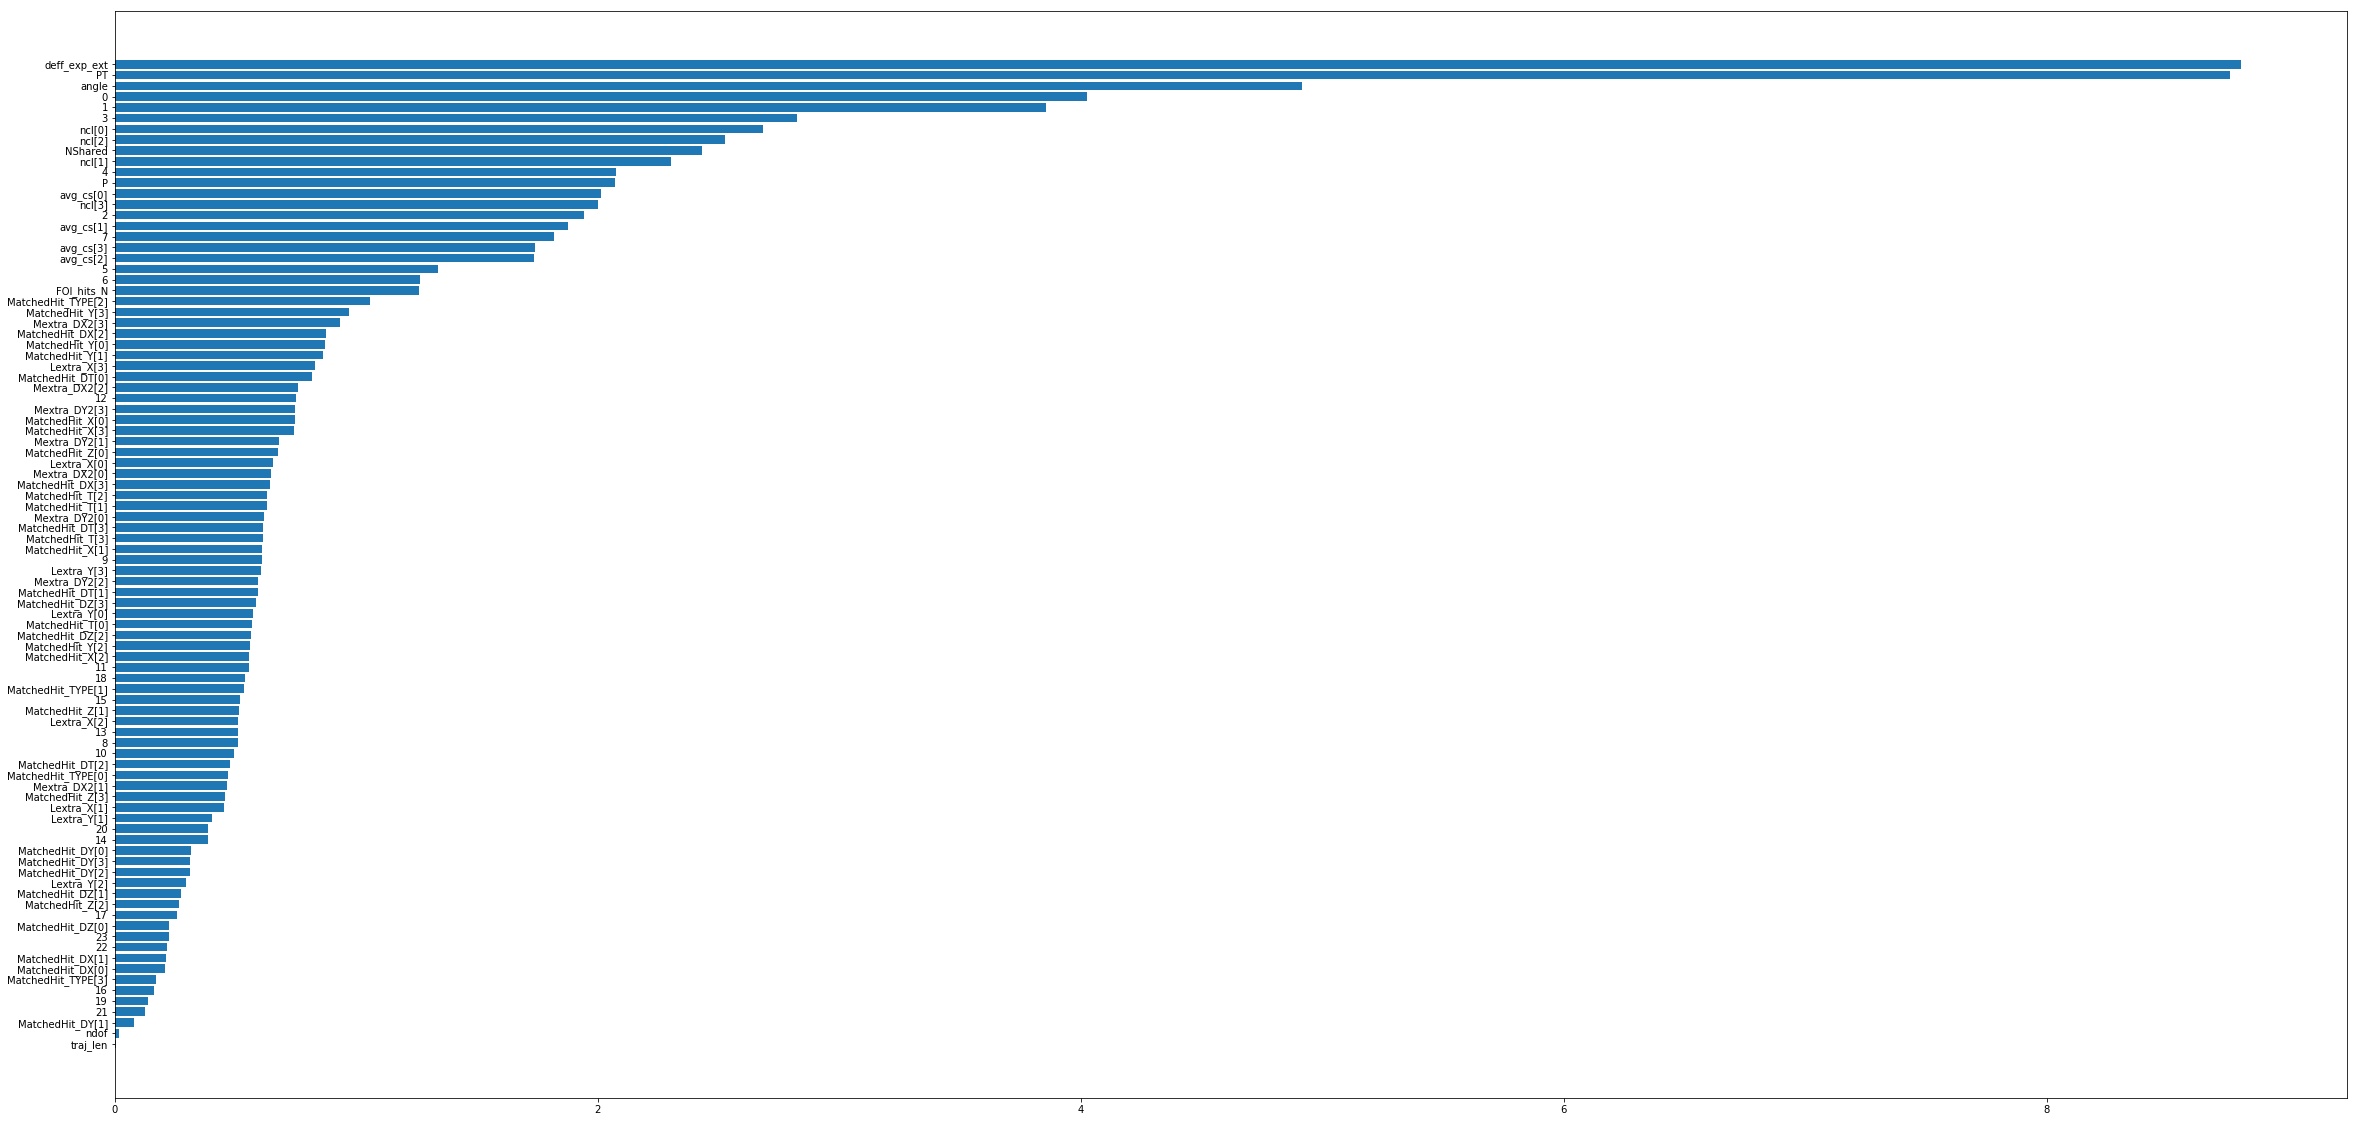

In [75]:
from collections import OrderedDict
from matplotlib import pyplot as plt
%matplotlib inline
feature_dict = {k:v for k,v in zip(model.steps[1][1].estimator.feature_names_, 
                                   model.steps[1][1].estimator.feature_importances_)}
feature_dict = OrderedDict(sorted(feature_dict.items(), key = lambda x:x[1]))

plt.figure(figsize = (40, 20))
plt.barh(list(range(len(feature_dict))), list(feature_dict.values()))
plt.yticks(range(len(feature_dict)), list(feature_dict.keys()))
plt.show()

### Отбор топ признаков по feature importance
Берем все, выкидываем по одной, меряем результат 

In [107]:
from collections import OrderedDict
OrderedDict(sorted(feature_dict.items(), key = lambda x:-x[1])[:23])

OrderedDict([('deff_exp_ext', 8.804120174319149),
             ('PT', 8.758313099910206),
             ('angle', 4.918251243418498),
             ('0', 4.024152886514487),
             ('1', 3.8553065192247695),
             ('3', 2.825593699667395),
             ('ncl[0]', 2.6860491510293927),
             ('ncl[2]', 2.527150024358813),
             ('NShared', 2.430836060615589),
             ('ncl[1]', 2.303511369556742),
             ('4', 2.0741098104085127),
             ('P', 2.072738604259885),
             ('avg_cs[0]', 2.012199735115815),
             ('ncl[3]', 1.9998863180379158),
             ('2', 1.9433636153717195),
             ('avg_cs[1]', 1.877148863683655),
             ('7', 1.8188042272937226),
             ('avg_cs[3]', 1.740507522041244),
             ('avg_cs[2]', 1.7367453465346825),
             ('5', 1.3395454355727452),
             ('6', 1.2654366185778345),
             ('FOI_hits_N', 1.2573693271668087),
             ('MatchedHit_TYPE[2]', 1.05576056905

In [234]:
new_features = [i[0] for i in (sorted(feature_dict.items(), key = lambda x:-x[1])[:23])]
for i in range(24):
    if str(i) not in new_features:
        new_features.append(str(i))

In [235]:
new_features

['deff_exp_ext',
 'PT',
 'angle',
 '0',
 '1',
 '3',
 'ncl[0]',
 'ncl[2]',
 'NShared',
 'ncl[1]',
 '4',
 'P',
 'avg_cs[0]',
 'ncl[3]',
 '2',
 'avg_cs[1]',
 '7',
 'avg_cs[3]',
 'avg_cs[2]',
 '5',
 '6',
 'FOI_hits_N',
 'MatchedHit_TYPE[2]',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [127]:
%%time

features = list(df_train.keys())
features.remove('label')
# features.remove('weight')
for feat in ['particle_type', 'sWeight', 'kinWeight']:
    if feat in features:
        features.remove(feat)
        
if 'weight' not in new_features:
    new_features = new_features+['weight']  

target = ['label']

estimator = catboost.CatBoostClassifier(iterations=2000, max_depth=8, thread_count=32, verbose=True)
clf = ModelClass(estimator = estimator, features = new_features)
transformer = FeatureTransformer()

model = Pipeline([('transformer', transformer),
                  ('clf', clf)])

model.fit(df_train[features], df_train[target])

features.remove('weight')
predictions = model.predict_proba(df_test[features])[:, 1]
pd.DataFrame(data={"prediction": predictions}, index=df_test.index).to_csv(
    "/nis/idao/results/catboost_3_new_features_plus_advanced_baseline_2000iter_only47_features.csv", index_label='id')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


fitting, using weight


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.103088
0:	learn: 0.6532984	total: 744ms	remaining: 24m 47s
1:	learn: 0.6251580	total: 1.38s	remaining: 22m 59s
2:	learn: 0.6040420	total: 2.03s	remaining: 22m 33s
3:	learn: 0.5866740	total: 2.69s	remaining: 22m 24s
4:	learn: 0.5732421	total: 3.36s	remaining: 22m 22s
5:	learn: 0.5631843	total: 4.12s	remaining: 22m 50s
6:	learn: 0.5527629	total: 4.82s	remaining: 22m 53s
7:	learn: 0.5461536	total: 5.4s	remaining: 22m 23s
8:	learn: 0.5387807	total: 6.06s	remaining: 22m 20s
9:	learn: 0.5338043	total: 6.68s	remaining: 22m 8s
10:	learn: 0.5289516	total: 7.31s	remaining: 22m 1s
11:	learn: 0.5247453	total: 8.03s	remaining: 22m 10s
12:	learn: 0.5206777	total: 8.67s	remaining: 22m 5s
13:	learn: 0.5175835	total: 9.32s	remaining: 22m 2s
14:	learn: 0.5141687	total: 9.94s	remaining: 21m 54s
15:	learn: 0.5109536	total: 10.6s	remaining: 21m 51s
16:	learn: 0.5087384	total: 11.2s	remaining: 21m 45s
17:	learn: 0.5065802	total: 11.8s	remaining: 21m 37s
18:	learn: 0.5040554	total: 12.

154:	learn: 0.4539635	total: 1m 36s	remaining: 19m 13s
155:	learn: 0.4538422	total: 1m 37s	remaining: 19m 13s
156:	learn: 0.4535461	total: 1m 38s	remaining: 19m 13s
157:	learn: 0.4534195	total: 1m 38s	remaining: 19m 12s
158:	learn: 0.4533122	total: 1m 39s	remaining: 19m 12s
159:	learn: 0.4531739	total: 1m 40s	remaining: 19m 11s
160:	learn: 0.4529525	total: 1m 40s	remaining: 19m 12s
161:	learn: 0.4527699	total: 1m 41s	remaining: 19m 10s
162:	learn: 0.4526451	total: 1m 41s	remaining: 19m 8s
163:	learn: 0.4524452	total: 1m 42s	remaining: 19m 7s
164:	learn: 0.4522119	total: 1m 43s	remaining: 19m 7s
165:	learn: 0.4520314	total: 1m 43s	remaining: 19m 7s
166:	learn: 0.4518290	total: 1m 44s	remaining: 19m 7s
167:	learn: 0.4517061	total: 1m 45s	remaining: 19m 6s
168:	learn: 0.4514819	total: 1m 45s	remaining: 19m 6s
169:	learn: 0.4513469	total: 1m 46s	remaining: 19m 5s
170:	learn: 0.4511521	total: 1m 47s	remaining: 19m 4s
171:	learn: 0.4509710	total: 1m 47s	remaining: 19m 4s
172:	learn: 0.450826

305:	learn: 0.4309978	total: 3m 12s	remaining: 17m 46s
306:	learn: 0.4308489	total: 3m 13s	remaining: 17m 46s
307:	learn: 0.4307857	total: 3m 14s	remaining: 17m 45s
308:	learn: 0.4306715	total: 3m 14s	remaining: 17m 44s
309:	learn: 0.4305833	total: 3m 15s	remaining: 17m 44s
310:	learn: 0.4304203	total: 3m 15s	remaining: 17m 43s
311:	learn: 0.4302769	total: 3m 16s	remaining: 17m 42s
312:	learn: 0.4301428	total: 3m 17s	remaining: 17m 42s
313:	learn: 0.4300480	total: 3m 17s	remaining: 17m 42s
314:	learn: 0.4299101	total: 3m 18s	remaining: 17m 41s
315:	learn: 0.4298221	total: 3m 19s	remaining: 17m 41s
316:	learn: 0.4296867	total: 3m 19s	remaining: 17m 40s
317:	learn: 0.4295997	total: 3m 20s	remaining: 17m 39s
318:	learn: 0.4294672	total: 3m 20s	remaining: 17m 38s
319:	learn: 0.4293742	total: 3m 21s	remaining: 17m 38s
320:	learn: 0.4292097	total: 3m 22s	remaining: 17m 38s
321:	learn: 0.4291005	total: 3m 23s	remaining: 17m 38s
322:	learn: 0.4290123	total: 3m 23s	remaining: 17m 37s
323:	learn

455:	learn: 0.4141793	total: 4m 50s	remaining: 16m 22s
456:	learn: 0.4140910	total: 4m 50s	remaining: 16m 21s
457:	learn: 0.4139543	total: 4m 51s	remaining: 16m 21s
458:	learn: 0.4138440	total: 4m 52s	remaining: 16m 20s
459:	learn: 0.4137531	total: 4m 52s	remaining: 16m 19s
460:	learn: 0.4136247	total: 4m 53s	remaining: 16m 19s
461:	learn: 0.4135123	total: 4m 53s	remaining: 16m 18s
462:	learn: 0.4134351	total: 4m 54s	remaining: 16m 18s
463:	learn: 0.4133312	total: 4m 55s	remaining: 16m 17s
464:	learn: 0.4132481	total: 4m 56s	remaining: 16m 17s
465:	learn: 0.4131269	total: 4m 56s	remaining: 16m 16s
466:	learn: 0.4130393	total: 4m 57s	remaining: 16m 15s
467:	learn: 0.4129173	total: 4m 57s	remaining: 16m 15s
468:	learn: 0.4127866	total: 4m 58s	remaining: 16m 15s
469:	learn: 0.4126694	total: 4m 59s	remaining: 16m 14s
470:	learn: 0.4126007	total: 5m	remaining: 16m 14s
471:	learn: 0.4125285	total: 5m	remaining: 16m 13s
472:	learn: 0.4124142	total: 5m 1s	remaining: 16m 12s
473:	learn: 0.41228

606:	learn: 0.3993379	total: 6m 30s	remaining: 14m 55s
607:	learn: 0.3992048	total: 6m 30s	remaining: 14m 54s
608:	learn: 0.3991131	total: 6m 31s	remaining: 14m 53s
609:	learn: 0.3990240	total: 6m 32s	remaining: 14m 53s
610:	learn: 0.3989498	total: 6m 32s	remaining: 14m 52s
611:	learn: 0.3988579	total: 6m 33s	remaining: 14m 51s
612:	learn: 0.3988078	total: 6m 33s	remaining: 14m 51s
613:	learn: 0.3987280	total: 6m 34s	remaining: 14m 50s
614:	learn: 0.3986019	total: 6m 35s	remaining: 14m 50s
615:	learn: 0.3985433	total: 6m 35s	remaining: 14m 49s
616:	learn: 0.3984417	total: 6m 36s	remaining: 14m 48s
617:	learn: 0.3983610	total: 6m 37s	remaining: 14m 48s
618:	learn: 0.3982624	total: 6m 37s	remaining: 14m 47s
619:	learn: 0.3981962	total: 6m 38s	remaining: 14m 46s
620:	learn: 0.3981088	total: 6m 39s	remaining: 14m 46s
621:	learn: 0.3980199	total: 6m 39s	remaining: 14m 45s
622:	learn: 0.3979651	total: 6m 40s	remaining: 14m 45s
623:	learn: 0.3978983	total: 6m 41s	remaining: 14m 44s
624:	learn

756:	learn: 0.3869487	total: 8m 9s	remaining: 13m 24s
757:	learn: 0.3868696	total: 8m 10s	remaining: 13m 23s
758:	learn: 0.3867846	total: 8m 11s	remaining: 13m 23s
759:	learn: 0.3867069	total: 8m 11s	remaining: 13m 22s
760:	learn: 0.3866249	total: 8m 12s	remaining: 13m 21s
761:	learn: 0.3865388	total: 8m 13s	remaining: 13m 21s
762:	learn: 0.3864448	total: 8m 14s	remaining: 13m 20s
763:	learn: 0.3863786	total: 8m 14s	remaining: 13m 20s
764:	learn: 0.3862886	total: 8m 15s	remaining: 13m 19s
765:	learn: 0.3861943	total: 8m 16s	remaining: 13m 19s
766:	learn: 0.3861369	total: 8m 16s	remaining: 13m 18s
767:	learn: 0.3860943	total: 8m 17s	remaining: 13m 17s
768:	learn: 0.3860134	total: 8m 17s	remaining: 13m 17s
769:	learn: 0.3859241	total: 8m 18s	remaining: 13m 16s
770:	learn: 0.3858519	total: 8m 19s	remaining: 13m 15s
771:	learn: 0.3857710	total: 8m 20s	remaining: 13m 15s
772:	learn: 0.3856775	total: 8m 20s	remaining: 13m 14s
773:	learn: 0.3856346	total: 8m 21s	remaining: 13m 14s
774:	learn:

907:	learn: 0.3760451	total: 9m 50s	remaining: 11m 49s
908:	learn: 0.3759721	total: 9m 50s	remaining: 11m 49s
909:	learn: 0.3758825	total: 9m 51s	remaining: 11m 48s
910:	learn: 0.3757896	total: 9m 52s	remaining: 11m 47s
911:	learn: 0.3757184	total: 9m 52s	remaining: 11m 47s
912:	learn: 0.3756522	total: 9m 53s	remaining: 11m 46s
913:	learn: 0.3755841	total: 9m 54s	remaining: 11m 45s
914:	learn: 0.3755186	total: 9m 54s	remaining: 11m 45s
915:	learn: 0.3754576	total: 9m 55s	remaining: 11m 44s
916:	learn: 0.3753690	total: 9m 56s	remaining: 11m 44s
917:	learn: 0.3753025	total: 9m 56s	remaining: 11m 43s
918:	learn: 0.3752371	total: 9m 57s	remaining: 11m 42s
919:	learn: 0.3751759	total: 9m 58s	remaining: 11m 42s
920:	learn: 0.3751231	total: 9m 58s	remaining: 11m 41s
921:	learn: 0.3750432	total: 9m 59s	remaining: 11m 40s
922:	learn: 0.3749829	total: 10m	remaining: 11m 40s
923:	learn: 0.3748920	total: 10m	remaining: 11m 39s
924:	learn: 0.3748269	total: 10m 1s	remaining: 11m 39s
925:	learn: 0.37

1054:	learn: 0.3661364	total: 11m 27s	remaining: 10m 16s
1055:	learn: 0.3660637	total: 11m 28s	remaining: 10m 15s
1056:	learn: 0.3659869	total: 11m 29s	remaining: 10m 14s
1057:	learn: 0.3659088	total: 11m 29s	remaining: 10m 14s
1058:	learn: 0.3658532	total: 11m 30s	remaining: 10m 13s
1059:	learn: 0.3657868	total: 11m 31s	remaining: 10m 13s
1060:	learn: 0.3657430	total: 11m 31s	remaining: 10m 12s
1061:	learn: 0.3656805	total: 11m 32s	remaining: 10m 11s
1062:	learn: 0.3656065	total: 11m 33s	remaining: 10m 11s
1063:	learn: 0.3655264	total: 11m 34s	remaining: 10m 10s
1064:	learn: 0.3654498	total: 11m 34s	remaining: 10m 10s
1065:	learn: 0.3653839	total: 11m 35s	remaining: 10m 9s
1066:	learn: 0.3653273	total: 11m 36s	remaining: 10m 8s
1067:	learn: 0.3652772	total: 11m 36s	remaining: 10m 8s
1068:	learn: 0.3652054	total: 11m 37s	remaining: 10m 7s
1069:	learn: 0.3651612	total: 11m 38s	remaining: 10m 6s
1070:	learn: 0.3651115	total: 11m 38s	remaining: 10m 6s
1071:	learn: 0.3650474	total: 11m 39s

1202:	learn: 0.3570289	total: 13m 7s	remaining: 8m 41s
1203:	learn: 0.3569624	total: 13m 8s	remaining: 8m 41s
1204:	learn: 0.3569026	total: 13m 9s	remaining: 8m 40s
1205:	learn: 0.3568618	total: 13m 9s	remaining: 8m 39s
1206:	learn: 0.3567806	total: 13m 10s	remaining: 8m 39s
1207:	learn: 0.3567062	total: 13m 11s	remaining: 8m 38s
1208:	learn: 0.3566539	total: 13m 11s	remaining: 8m 38s
1209:	learn: 0.3566002	total: 13m 12s	remaining: 8m 37s
1210:	learn: 0.3565288	total: 13m 13s	remaining: 8m 36s
1211:	learn: 0.3564930	total: 13m 13s	remaining: 8m 36s
1212:	learn: 0.3564209	total: 13m 14s	remaining: 8m 35s
1213:	learn: 0.3563728	total: 13m 15s	remaining: 8m 34s
1214:	learn: 0.3563166	total: 13m 15s	remaining: 8m 34s
1215:	learn: 0.3562518	total: 13m 16s	remaining: 8m 33s
1216:	learn: 0.3561952	total: 13m 17s	remaining: 8m 32s
1217:	learn: 0.3561308	total: 13m 17s	remaining: 8m 32s
1218:	learn: 0.3560706	total: 13m 18s	remaining: 8m 31s
1219:	learn: 0.3560085	total: 13m 19s	remaining: 8m 

1350:	learn: 0.3486133	total: 14m 47s	remaining: 7m 6s
1351:	learn: 0.3485629	total: 14m 48s	remaining: 7m 5s
1352:	learn: 0.3485175	total: 14m 48s	remaining: 7m 5s
1353:	learn: 0.3484556	total: 14m 49s	remaining: 7m 4s
1354:	learn: 0.3484050	total: 14m 50s	remaining: 7m 3s
1355:	learn: 0.3483505	total: 14m 51s	remaining: 7m 3s
1356:	learn: 0.3483010	total: 14m 51s	remaining: 7m 2s
1357:	learn: 0.3482614	total: 14m 52s	remaining: 7m 1s
1358:	learn: 0.3481907	total: 14m 53s	remaining: 7m 1s
1359:	learn: 0.3481396	total: 14m 53s	remaining: 7m
1360:	learn: 0.3481125	total: 14m 54s	remaining: 6m 59s
1361:	learn: 0.3480673	total: 14m 55s	remaining: 6m 59s
1362:	learn: 0.3480207	total: 14m 55s	remaining: 6m 58s
1363:	learn: 0.3479638	total: 14m 56s	remaining: 6m 58s
1364:	learn: 0.3479112	total: 14m 57s	remaining: 6m 57s
1365:	learn: 0.3478603	total: 14m 57s	remaining: 6m 56s
1366:	learn: 0.3478070	total: 14m 58s	remaining: 6m 56s
1367:	learn: 0.3477740	total: 14m 59s	remaining: 6m 55s
1368:

1498:	learn: 0.3409438	total: 16m 27s	remaining: 5m 30s
1499:	learn: 0.3409110	total: 16m 28s	remaining: 5m 29s
1500:	learn: 0.3408632	total: 16m 29s	remaining: 5m 28s
1501:	learn: 0.3408200	total: 16m 29s	remaining: 5m 28s
1502:	learn: 0.3407805	total: 16m 30s	remaining: 5m 27s
1503:	learn: 0.3407338	total: 16m 31s	remaining: 5m 26s
1504:	learn: 0.3406873	total: 16m 31s	remaining: 5m 26s
1505:	learn: 0.3406243	total: 16m 32s	remaining: 5m 25s
1506:	learn: 0.3405749	total: 16m 33s	remaining: 5m 24s
1507:	learn: 0.3405417	total: 16m 33s	remaining: 5m 24s
1508:	learn: 0.3404912	total: 16m 34s	remaining: 5m 23s
1509:	learn: 0.3404320	total: 16m 35s	remaining: 5m 22s
1510:	learn: 0.3403946	total: 16m 35s	remaining: 5m 22s
1511:	learn: 0.3403376	total: 16m 36s	remaining: 5m 21s
1512:	learn: 0.3402772	total: 16m 37s	remaining: 5m 20s
1513:	learn: 0.3402145	total: 16m 37s	remaining: 5m 20s
1514:	learn: 0.3401626	total: 16m 38s	remaining: 5m 19s
1515:	learn: 0.3401042	total: 16m 39s	remaining:

1646:	learn: 0.3337797	total: 18m 7s	remaining: 3m 53s
1647:	learn: 0.3337565	total: 18m 8s	remaining: 3m 52s
1648:	learn: 0.3337216	total: 18m 9s	remaining: 3m 51s
1649:	learn: 0.3336653	total: 18m 9s	remaining: 3m 51s
1650:	learn: 0.3336098	total: 18m 10s	remaining: 3m 50s
1651:	learn: 0.3335763	total: 18m 11s	remaining: 3m 49s
1652:	learn: 0.3335326	total: 18m 11s	remaining: 3m 49s
1653:	learn: 0.3334841	total: 18m 12s	remaining: 3m 48s
1654:	learn: 0.3334285	total: 18m 13s	remaining: 3m 47s
1655:	learn: 0.3333762	total: 18m 13s	remaining: 3m 47s
1656:	learn: 0.3333453	total: 18m 14s	remaining: 3m 46s
1657:	learn: 0.3333055	total: 18m 15s	remaining: 3m 45s
1658:	learn: 0.3332488	total: 18m 15s	remaining: 3m 45s
1659:	learn: 0.3331964	total: 18m 16s	remaining: 3m 44s
1660:	learn: 0.3331410	total: 18m 17s	remaining: 3m 43s
1661:	learn: 0.3330919	total: 18m 17s	remaining: 3m 43s
1662:	learn: 0.3330420	total: 18m 18s	remaining: 3m 42s
1663:	learn: 0.3329744	total: 18m 19s	remaining: 3m 

1793:	learn: 0.3272457	total: 19m 48s	remaining: 2m 16s
1794:	learn: 0.3272095	total: 19m 48s	remaining: 2m 15s
1795:	learn: 0.3271706	total: 19m 49s	remaining: 2m 15s
1796:	learn: 0.3271190	total: 19m 50s	remaining: 2m 14s
1797:	learn: 0.3270751	total: 19m 50s	remaining: 2m 13s
1798:	learn: 0.3270206	total: 19m 51s	remaining: 2m 13s
1799:	learn: 0.3269678	total: 19m 52s	remaining: 2m 12s
1800:	learn: 0.3269283	total: 19m 52s	remaining: 2m 11s
1801:	learn: 0.3268976	total: 19m 53s	remaining: 2m 11s
1802:	learn: 0.3268542	total: 19m 54s	remaining: 2m 10s
1803:	learn: 0.3268021	total: 19m 54s	remaining: 2m 9s
1804:	learn: 0.3267607	total: 19m 55s	remaining: 2m 9s
1805:	learn: 0.3267194	total: 19m 56s	remaining: 2m 8s
1806:	learn: 0.3266655	total: 19m 56s	remaining: 2m 7s
1807:	learn: 0.3266202	total: 19m 57s	remaining: 2m 7s
1808:	learn: 0.3265754	total: 19m 58s	remaining: 2m 6s
1809:	learn: 0.3265253	total: 19m 59s	remaining: 2m 5s
1810:	learn: 0.3264882	total: 19m 59s	remaining: 2m 5s


1942:	learn: 0.3208613	total: 21m 30s	remaining: 37.9s
1943:	learn: 0.3208258	total: 21m 31s	remaining: 37.2s
1944:	learn: 0.3207896	total: 21m 31s	remaining: 36.5s
1945:	learn: 0.3207437	total: 21m 32s	remaining: 35.9s
1946:	learn: 0.3207072	total: 21m 33s	remaining: 35.2s
1947:	learn: 0.3206580	total: 21m 34s	remaining: 34.5s
1948:	learn: 0.3206243	total: 21m 34s	remaining: 33.9s
1949:	learn: 0.3205835	total: 21m 35s	remaining: 33.2s
1950:	learn: 0.3205346	total: 21m 36s	remaining: 32.6s
1951:	learn: 0.3204895	total: 21m 36s	remaining: 31.9s
1952:	learn: 0.3204645	total: 21m 37s	remaining: 31.2s
1953:	learn: 0.3204095	total: 21m 38s	remaining: 30.6s
1954:	learn: 0.3203747	total: 21m 38s	remaining: 29.9s
1955:	learn: 0.3203223	total: 21m 39s	remaining: 29.2s
1956:	learn: 0.3202833	total: 21m 40s	remaining: 28.6s
1957:	learn: 0.3202455	total: 21m 40s	remaining: 27.9s
1958:	learn: 0.3202005	total: 21m 41s	remaining: 27.2s
1959:	learn: 0.3201677	total: 21m 42s	remaining: 26.6s
1960:	lear

In [116]:
predictions = model.predict_proba(df_test[new_features])[:, 1]



[8.804120174319149,
 8.758313099910206,
 4.918251243418498,
 4.024152886514487,
 3.8553065192247695,
 2.825593699667395,
 2.6860491510293927,
 2.527150024358813,
 2.430836060615589,
 2.303511369556742,
 2.0741098104085127,
 2.072738604259885,
 2.012199735115815,
 1.9998863180379158,
 1.9433636153717195,
 1.877148863683655,
 1.8188042272937226,
 1.740507522041244,
 1.7367453465346825,
 1.3395454355727452,
 1.2654366185778345,
 1.2573693271668087,
 1.055760569052657,
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23']

In [39]:
len(model.steps[0][1].SIMPLE_FEATURES)

68

In [108]:
features

['ncl[0]',
 'ncl[1]',
 'ncl[2]',
 'ncl[3]',
 'avg_cs[0]',
 'avg_cs[1]',
 'avg_cs[2]',
 'avg_cs[3]',
 'ndof',
 'MatchedHit_TYPE[0]',
 'MatchedHit_TYPE[1]',
 'MatchedHit_TYPE[2]',
 'MatchedHit_TYPE[3]',
 'MatchedHit_X[0]',
 'MatchedHit_X[1]',
 'MatchedHit_X[2]',
 'MatchedHit_X[3]',
 'MatchedHit_Y[0]',
 'MatchedHit_Y[1]',
 'MatchedHit_Y[2]',
 'MatchedHit_Y[3]',
 'MatchedHit_Z[0]',
 'MatchedHit_Z[1]',
 'MatchedHit_Z[2]',
 'MatchedHit_Z[3]',
 'MatchedHit_DX[0]',
 'MatchedHit_DX[1]',
 'MatchedHit_DX[2]',
 'MatchedHit_DX[3]',
 'MatchedHit_DY[0]',
 'MatchedHit_DY[1]',
 'MatchedHit_DY[2]',
 'MatchedHit_DY[3]',
 'MatchedHit_DZ[0]',
 'MatchedHit_DZ[1]',
 'MatchedHit_DZ[2]',
 'MatchedHit_DZ[3]',
 'MatchedHit_T[0]',
 'MatchedHit_T[1]',
 'MatchedHit_T[2]',
 'MatchedHit_T[3]',
 'MatchedHit_DT[0]',
 'MatchedHit_DT[1]',
 'MatchedHit_DT[2]',
 'MatchedHit_DT[3]',
 'Lextra_X[0]',
 'Lextra_X[1]',
 'Lextra_X[2]',
 'Lextra_X[3]',
 'Lextra_Y[0]',
 'Lextra_Y[1]',
 'Lextra_Y[2]',
 'Lextra_Y[3]',
 'NShared',
 'M